In [ ]:
Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization,
Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) &&
(AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian
non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back 
to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

The prediction should be whether a person makes $50k a year or not.This is a binary classification problem.

In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data
df=pd.read_csv(r"C:\Users\bee\Desktop\Data set\Census Income.csv")

In [4]:
#print first 5 records
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
#print last 5 records
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
#checking the shape of the data
#there are 32560 rows and 15 columns
df.shape

(32560, 15)

In [7]:
df.dtypes#Checking the data types of all columns

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
#Checking information about the dataset
df.info()
#The data contains 6 int64 data columns ad 9 object columns,memory used is above 3.7MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#checking columns of dataset
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
#Checking Duplicate value in data set
print("Total Duplicate Rows are",df.duplicated().sum())# no duplicates

Total Duplicate Rows are 24


In [11]:
#removing duplicates
df. drop_duplicates(inplace=True)

In [12]:
#Checking if Duplicates have been removed
print("Total Duplicate Rows are",df.duplicated().sum())

Total Duplicate Rows are 0


In [13]:
#Checking unique values of each columns
df.nunique().to_frame("No. of Unique values")#I can clearly see the number of uniques values per each column

,No. of Unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [14]:
#checking the value of count of each column(this is to get count of frequency of each unique value in column)
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


Workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Fnlwgt
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: count, Length: 21647, dtype: int64


Education
HS-grad         10494
Some-college     7282
Bachelors        5352
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype:

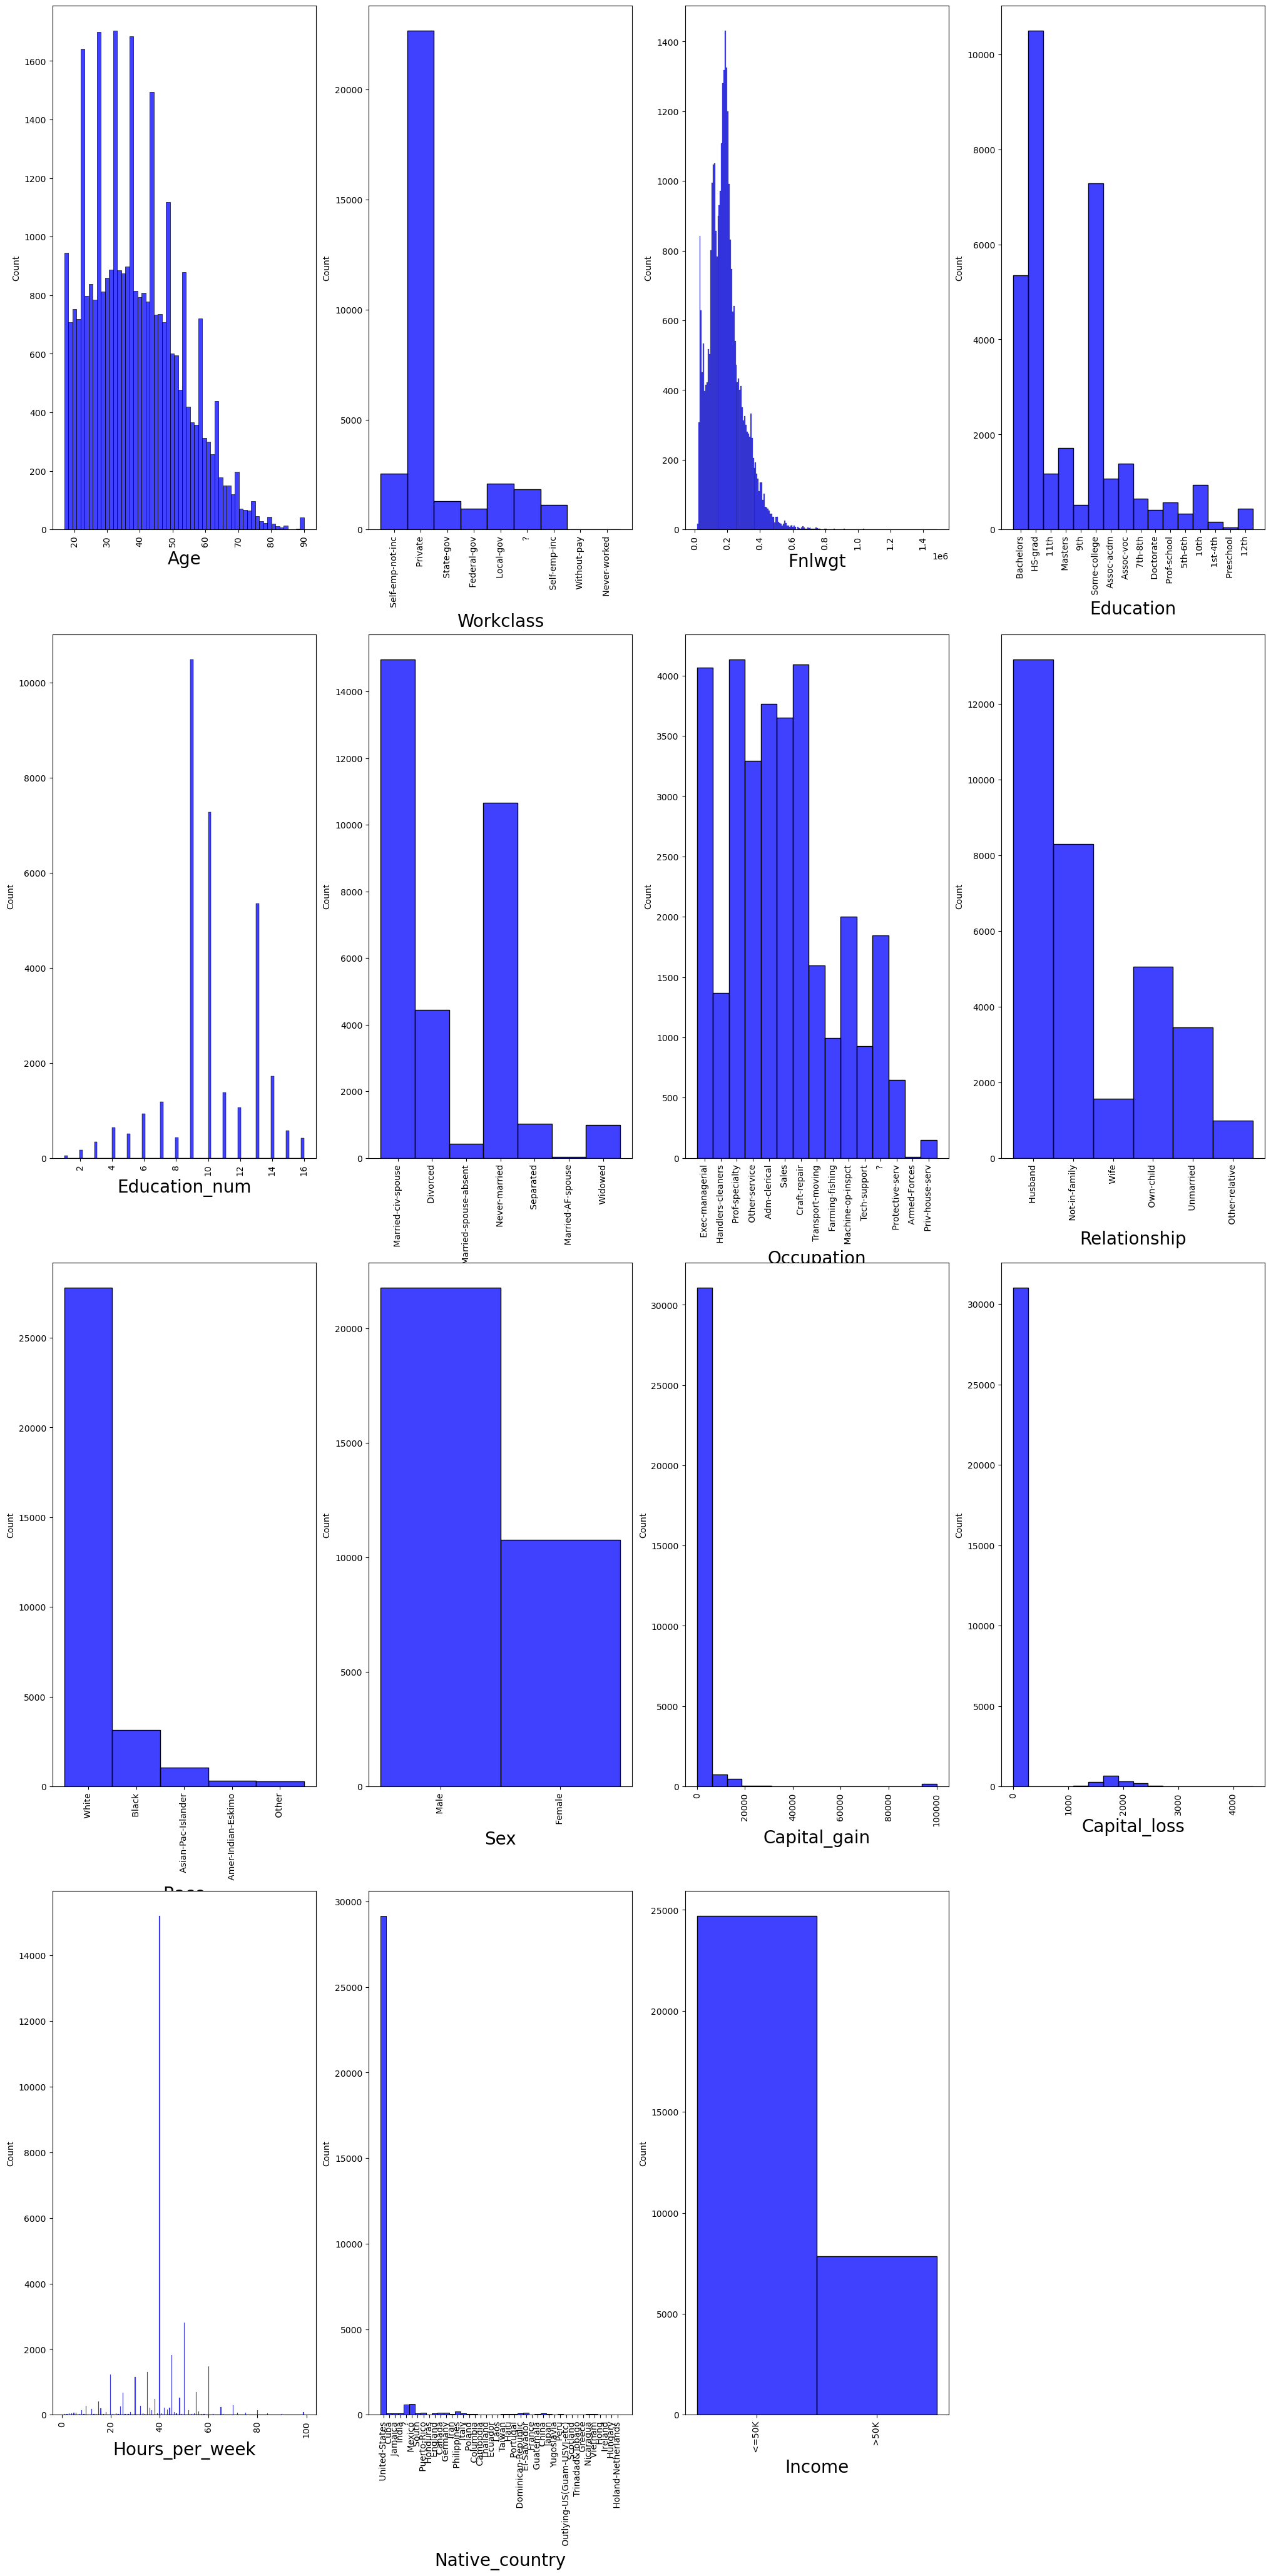

In [15]:
#Getting a graphical view of value counts for each column
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=15:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=90, fontsize=10)
        
    plotnumber +=1
plt.show()

In [ ]:
Discussion of each column

Age-the most common age in the dataset is 36
    
Workclass-there are 9 Workclass elements in the data,one of which is a ?,this will be resolved in preprocessing.

The private sector is the dorminant Workclass

Fnlwgt-there are three most common final weights
    
Education-there are 16 level of education from Preschool up to Doctrate,HS-grad is the most frequent
    
Education_num-there are 16 ranks(1-16) of levels education from Preschool(1) up to Masters,HS-grad(rank 9) is the most frequent

Marital_status-this column has 7 types of status with majority in Married-civ-spouse
 
Occupation-there are 15 types of occupations with Prof-specialty as the most common,one of them is a ?,this will be resolved in preprocessing
 
Relationship-there are 6 types of relationships with husband as the most frequent type of relationship
    
Race-there are 5 types of race and the most common is the white demographic

Sex-the most dorminant gender in the dataset are male
   
Capital_gain-majority have no capital gain
   
Capital_loss-majority have no capital gain
    
Hours_per_week-most of the people work a 40 hour week
    
Native_country-out of the 42 countries most people originate from the United-States,one of them is a ?this will be resolved in preprocessing
   
Income -this is the target variable.There are two possible income brackets,majority earn less than 50k,there is an imbalance.

In [16]:
#Checking for null or missing values in the dataset
df.isnull().sum()# no null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

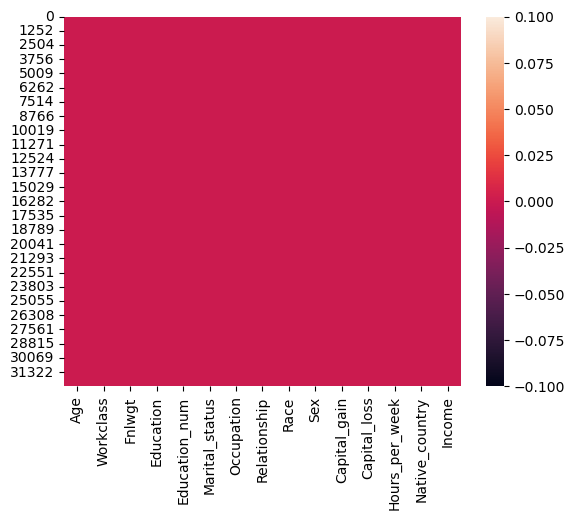

In [17]:
#visualize null using a heatmap
sns.heatmap(df.isnull())#visual confirmation of no null values 

In [18]:
#education num show the same detail as Education but just in numerical format,I will keep Education because it will be easy to make sense of it in visualization
df = df.drop(columns=['Education_num'])

In [19]:
#check data shape after removing some columns
df.shape

(32536, 14)

In [20]:
#Dealing with question marks in certain columns
columns_with_questionmark = ['Workclass','Occupation','Native_country']

In [21]:
#checking mode of columns with question mark
df[columns_with_questionmark].mode()

,Workclass,Occupation,Native_country
0,Private,Prof-specialty,United-States


In [22]:
#checking the most common type (mode) of Workclass
df['Workclass'].mode()[0]

' Private'

In [23]:
#checking the most common type (mode) of Occupation
df['Occupation'].mode()[0]

' Prof-specialty'

In [24]:
#checking the most common type (mode) of Native_country
df['Native_country'].mode()[0]

' United-States'

In [25]:
# replace ? with nan
df=df.replace(' ?',np.nan)

In [26]:
for i in ['Workclass','Occupation','Native_country']:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [27]:
#checking if ? have been filled by mode for Workclass column
df["Workclass"].value_counts()

Workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [28]:
#checking if ? have been filled by mode for Occupation column
df["Occupation"].value_counts()

Occupation
Prof-specialty       5979
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [29]:
#checking if ? have been filled by mode for Native_country column
df["Native_country"].value_counts()

Native_country
United-States                 29734
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [30]:
#All '?' columns were intergrated into the most frequent column

In [30]:
#Statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


In [ ]:
Interpretation of the Statistical summary of dataset

General view
#from the statistical description above the count of all columns are similar therefore no missing data values
#mean value of all columns is greater than the median(second percentile)therefore the data is skewed to the right.This will be dealt with later
#In all columns there are huge differences between the third percentile and max values which signify the existance of outliers in the data. 

Column specific statistical view

Age: The average age is approximately 38.5 years, with a minimum of 17 and a maximum of 90 years.The standard deviation shows a low 
     variability in age.

Fnlwgt: The mean of final weights is approximately 189794.29,from a minimum of 12285 units to a maximum of 1484705, 
        The standard deviation shows a huge variability in the column.
    
Capital_gain-The minimum capital gain is 0 and maximum value is 99999.The mean capital gain is 1078.
             
Capital_loss: The minimum capital loss is 0 and maximum value is 4356.The mean capital loss is 87.

Hours_per_week: The minimum hours per week  is 1 and maximum value are 99.The mean 40 hours per week.



In [31]:
#Summary of columns with categorical data
df.describe(include='object')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32536,32536,32536,32536,32536,32536,32536,32536,32536
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24509,10494,14970,5979,13187,27794,21774,29734,24697


In [ ]:
count-the count of values is similar therefore there are no missing value
unique-these are the number of unique values per column
top-the most frequent column item
freq-frequency in numerical form

In [33]:
categorical = ['Workclass', 'Education','Marital_status','Ocuppation','Relationship','Race','Sex','Native_country','Income']
numerical = ['Age', 'Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']

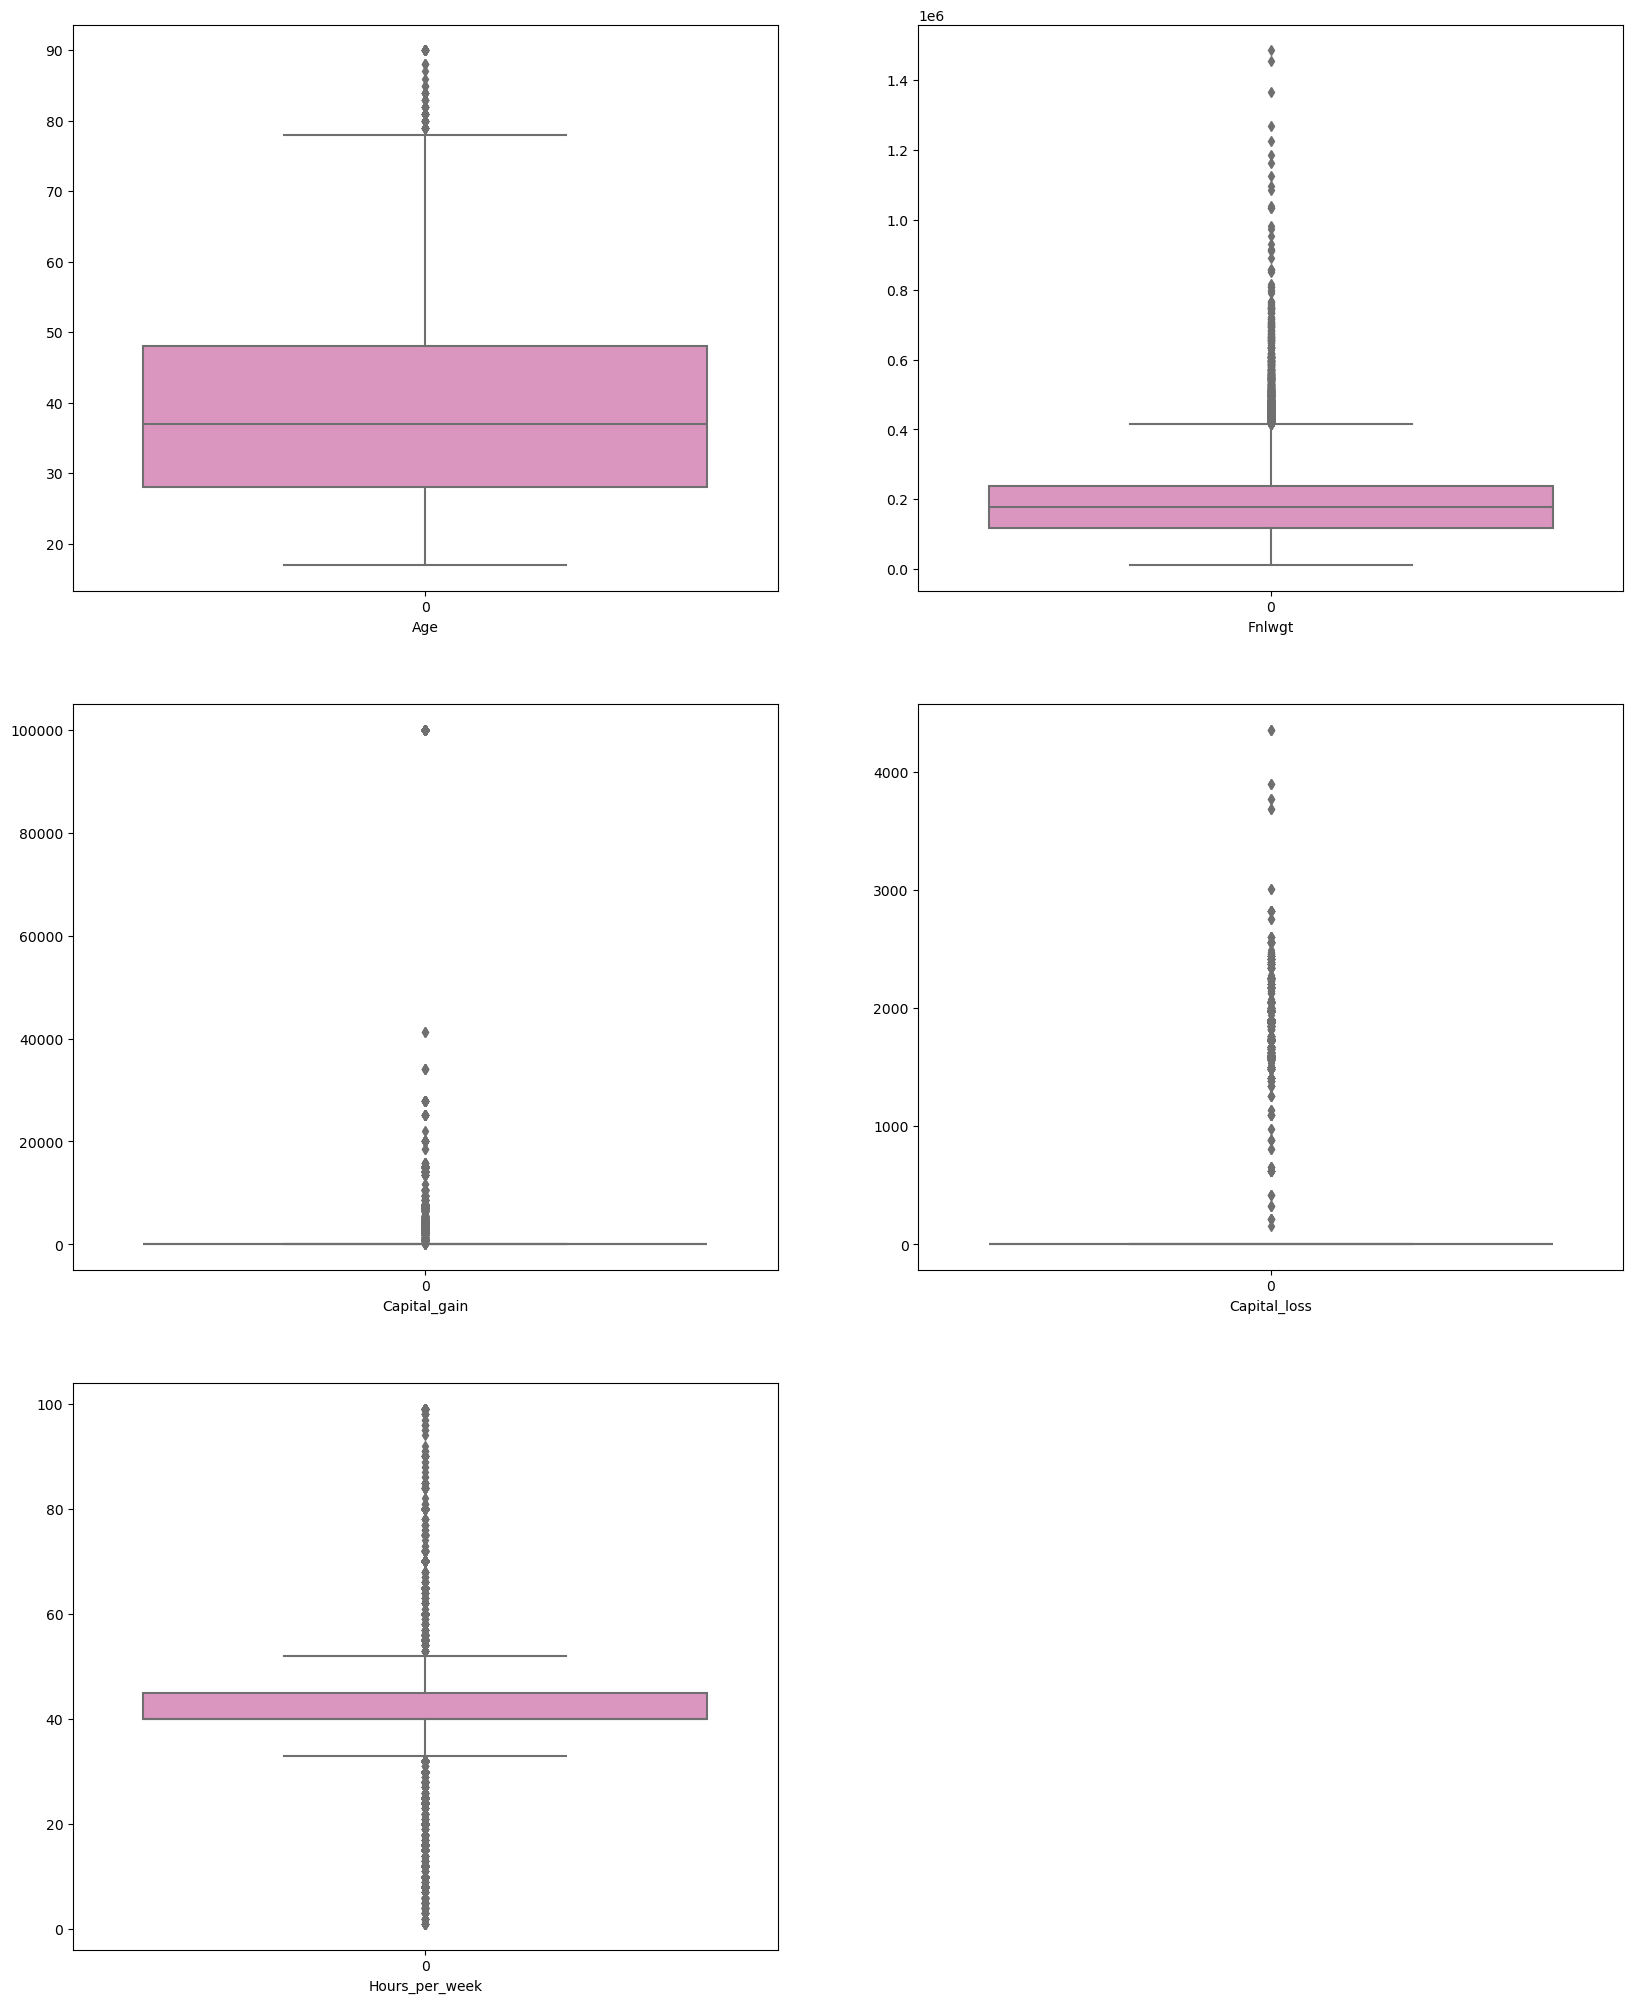

In [34]:
#Let's check data distribution and outliers using boxplot
#please note that this is for numerical columns only and its evident that there are outliers in all columns as mention in the statistical summary
#Outliers will be dealt with later
plt.figure(figsize=(20,25))
p=1
for column in numerical:
    if p<=5:
        plt.subplot(3,2,p)
        sns.boxplot(df[column], palette ="Set2_r")
        plt.xlabel(column)
        
    p+=1
    
plt.show()

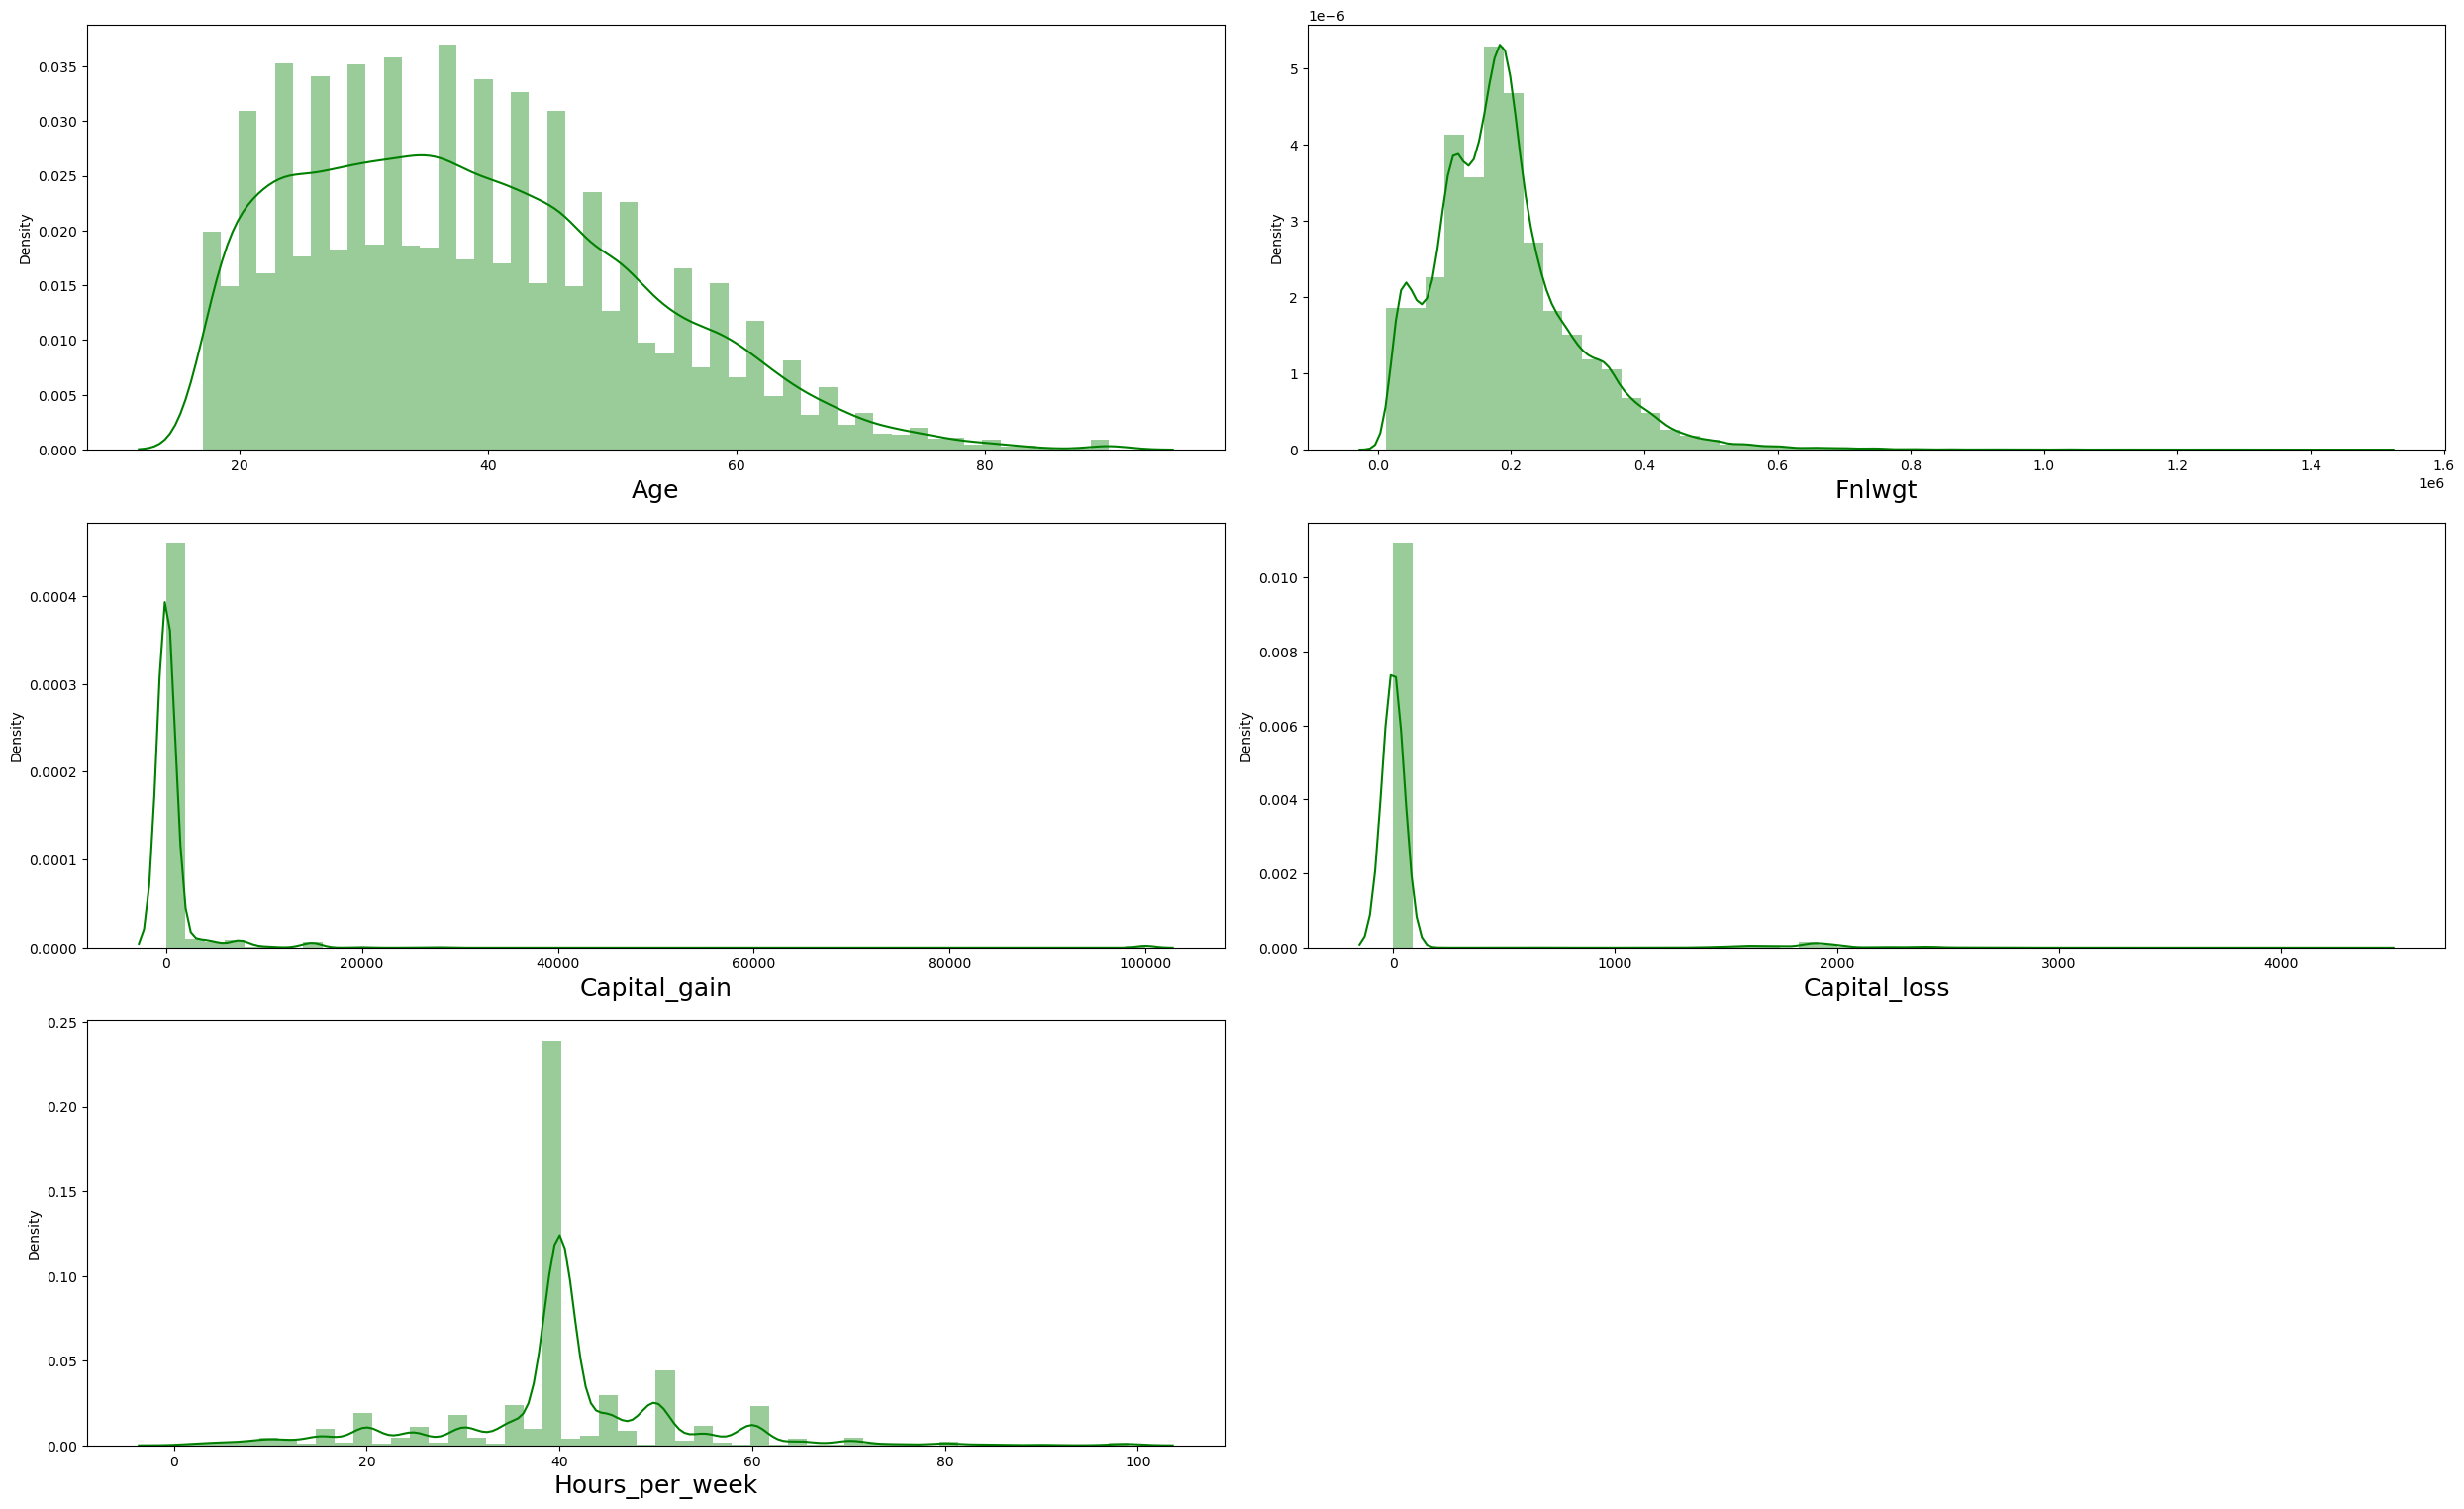

In [35]:
#Checking the distribution of data using distribution plot
#This is for numerical columns only 
#I see a trend of normal distribution with a lot of skeweness as discussed in the statistical summary
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=5:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'green')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()

In [ ]:
#Univariate Analysis-Categorical columns

<bound method IndexOpsMixin.value_counts of 0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: Workclass, Length: 32536, dtype: object>


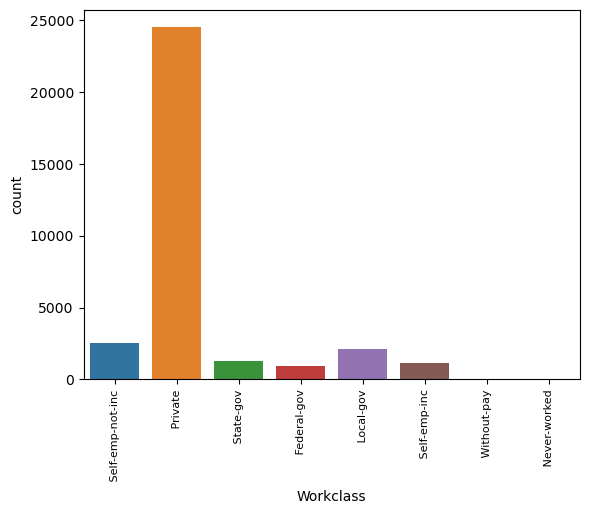

In [36]:
ax=sns.countplot(x='Workclass',data=df)
plt.xticks(rotation=90, fontsize=8)
print(df['Workclass'].value_counts)
#Private sector hold the most employmenet

<bound method IndexOpsMixin.value_counts of 0          Bachelors
1            HS-grad
2               11th
3          Bachelors
4            Masters
            ...     
32555     Assoc-acdm
32556        HS-grad
32557        HS-grad
32558        HS-grad
32559        HS-grad
Name: Education, Length: 32536, dtype: object>


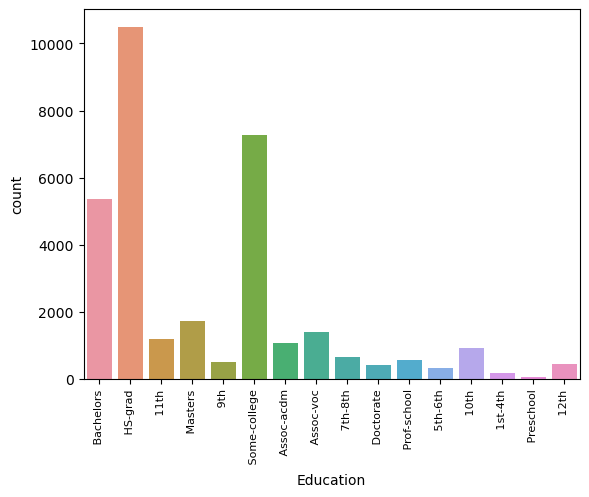

In [37]:
ax=sns.countplot(x='Education',data=df)
plt.xticks(rotation=90, fontsize=8)
print(df['Education'].value_counts)
#the most common level of education is Hs grad

<bound method IndexOpsMixin.value_counts of 0               Husband
1         Not-in-family
2               Husband
3                  Wife
4                  Wife
              ...      
32555              Wife
32556           Husband
32557         Unmarried
32558         Own-child
32559              Wife
Name: Relationship, Length: 32536, dtype: object>


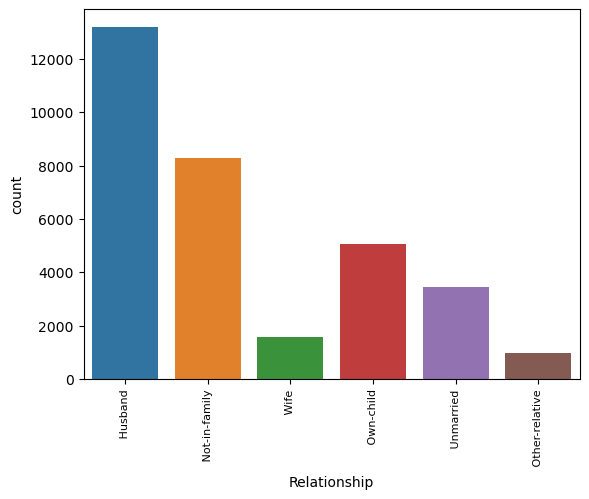

In [38]:
ax=sns.countplot(x='Relationship',data=df)
plt.xticks(rotation=90, fontsize=8)
print(df['Relationship'].value_counts)

<bound method IndexOpsMixin.value_counts of 0         White
1         White
2         Black
3         Black
4         White
          ...  
32555     White
32556     White
32557     White
32558     White
32559     White
Name: Race, Length: 32536, dtype: object>


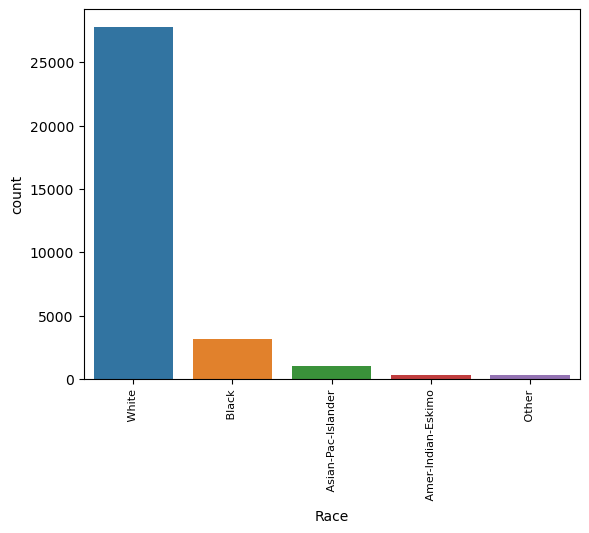

In [39]:
ax=sns.countplot(x='Race',data=df)
plt.xticks(rotation=90, fontsize=8)
print(df['Race'].value_counts)

<bound method IndexOpsMixin.value_counts of 0           Male
1           Male
2           Male
3         Female
4         Female
          ...   
32555     Female
32556       Male
32557     Female
32558       Male
32559     Female
Name: Sex, Length: 32536, dtype: object>


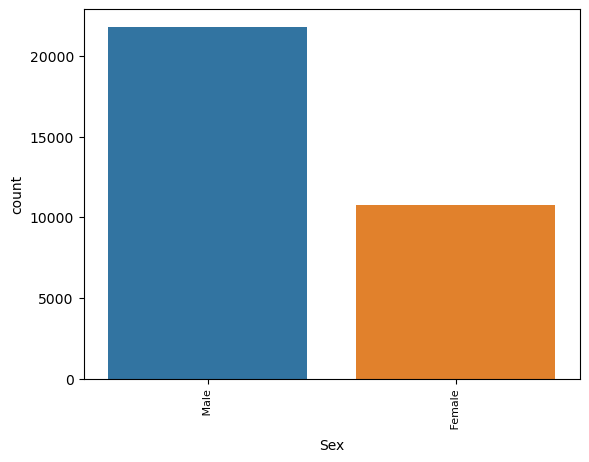

In [40]:
ax=sns.countplot(x='Sex',data=df)
plt.xticks(rotation=90, fontsize=8)
print(df['Sex'].value_counts)

<bound method IndexOpsMixin.value_counts of 0         United-States
1         United-States
2         United-States
3                  Cuba
4         United-States
              ...      
32555     United-States
32556     United-States
32557     United-States
32558     United-States
32559     United-States
Name: Native_country, Length: 32536, dtype: object>


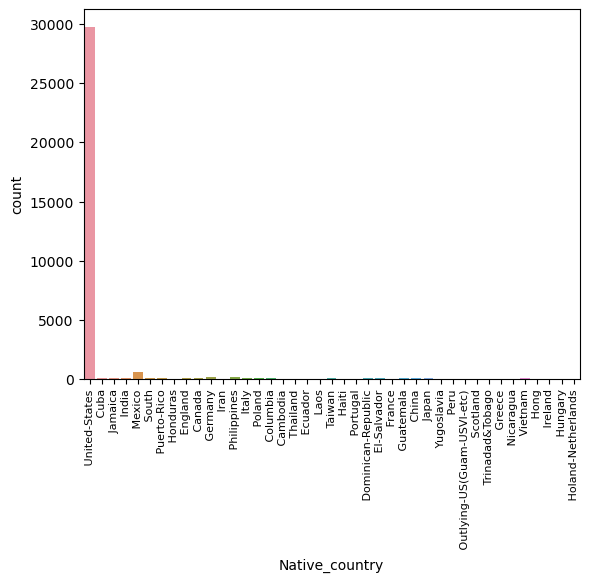

In [41]:
ax=sns.countplot(x='Native_country',data=df)
plt.xticks(rotation=90, fontsize=8)
print(df['Native_country'].value_counts)

<bound method IndexOpsMixin.value_counts of 0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: Workclass, Length: 32536, dtype: object>


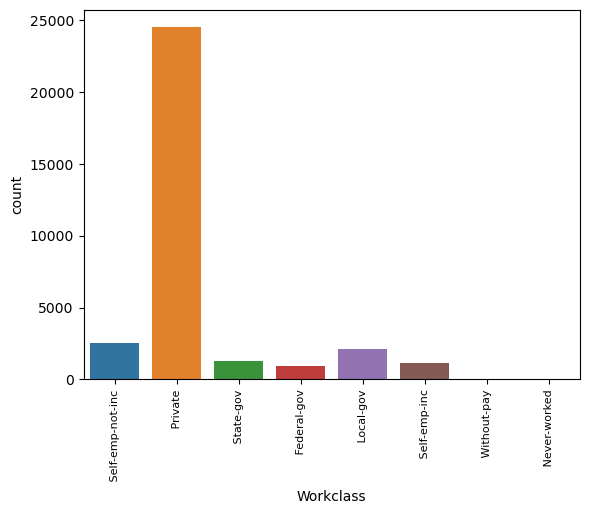

In [42]:
ax=sns.countplot(x='Workclass',data=df)
plt.xticks(rotation=90, fontsize=8)
print(df['Workclass'].value_counts)

<bound method IndexOpsMixin.value_counts of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32536, dtype: object>


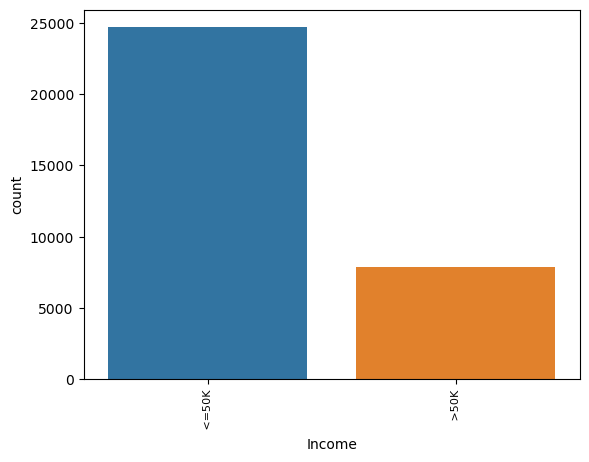

In [43]:
ax=sns.countplot(x='Income',data=df)
plt.xticks(rotation=90, fontsize=8)
print(df['Income'].value_counts)

<bound method IndexOpsMixin.value_counts of 0         Married-civ-spouse
1                   Divorced
2         Married-civ-spouse
3         Married-civ-spouse
4         Married-civ-spouse
                ...         
32555     Married-civ-spouse
32556     Married-civ-spouse
32557                Widowed
32558          Never-married
32559     Married-civ-spouse
Name: Marital_status, Length: 32536, dtype: object>


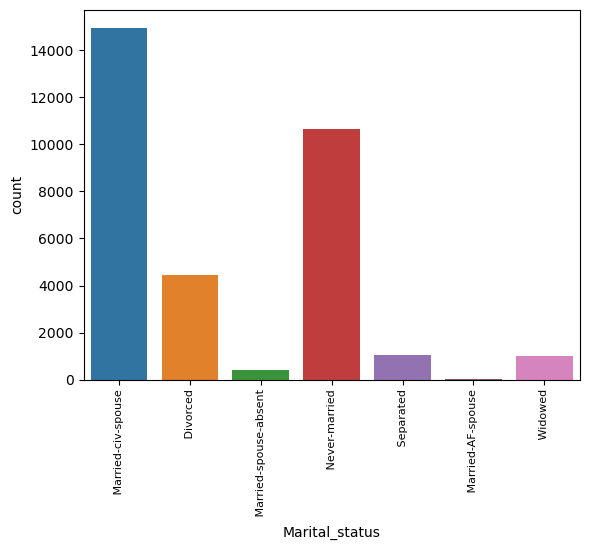

In [44]:
ax=sns.countplot(x='Marital_status',data=df)
plt.xticks(rotation=90, fontsize=8)
print(df['Marital_status'].value_counts)

<bound method IndexOpsMixin.value_counts of 0           Exec-managerial
1         Handlers-cleaners
2         Handlers-cleaners
3            Prof-specialty
4           Exec-managerial
                ...        
32555          Tech-support
32556     Machine-op-inspct
32557          Adm-clerical
32558          Adm-clerical
32559       Exec-managerial
Name: Occupation, Length: 32536, dtype: object>


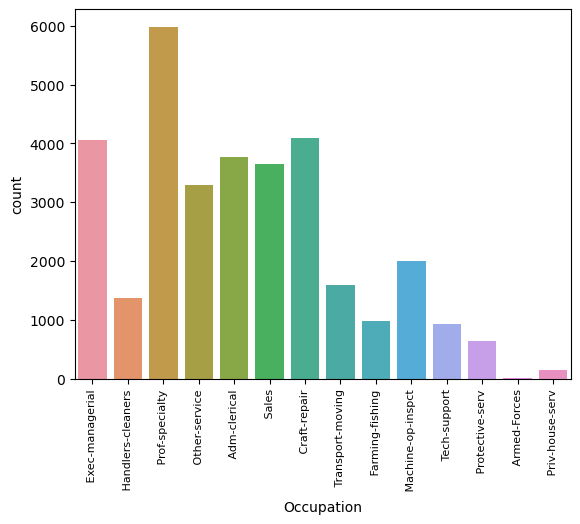

In [45]:
ax=sns.countplot(x='Occupation',data=df)
plt.xticks(rotation=90, fontsize=8)
print(df['Occupation'].value_counts)

In [ ]:
#Univariate Analysis-numerical columns

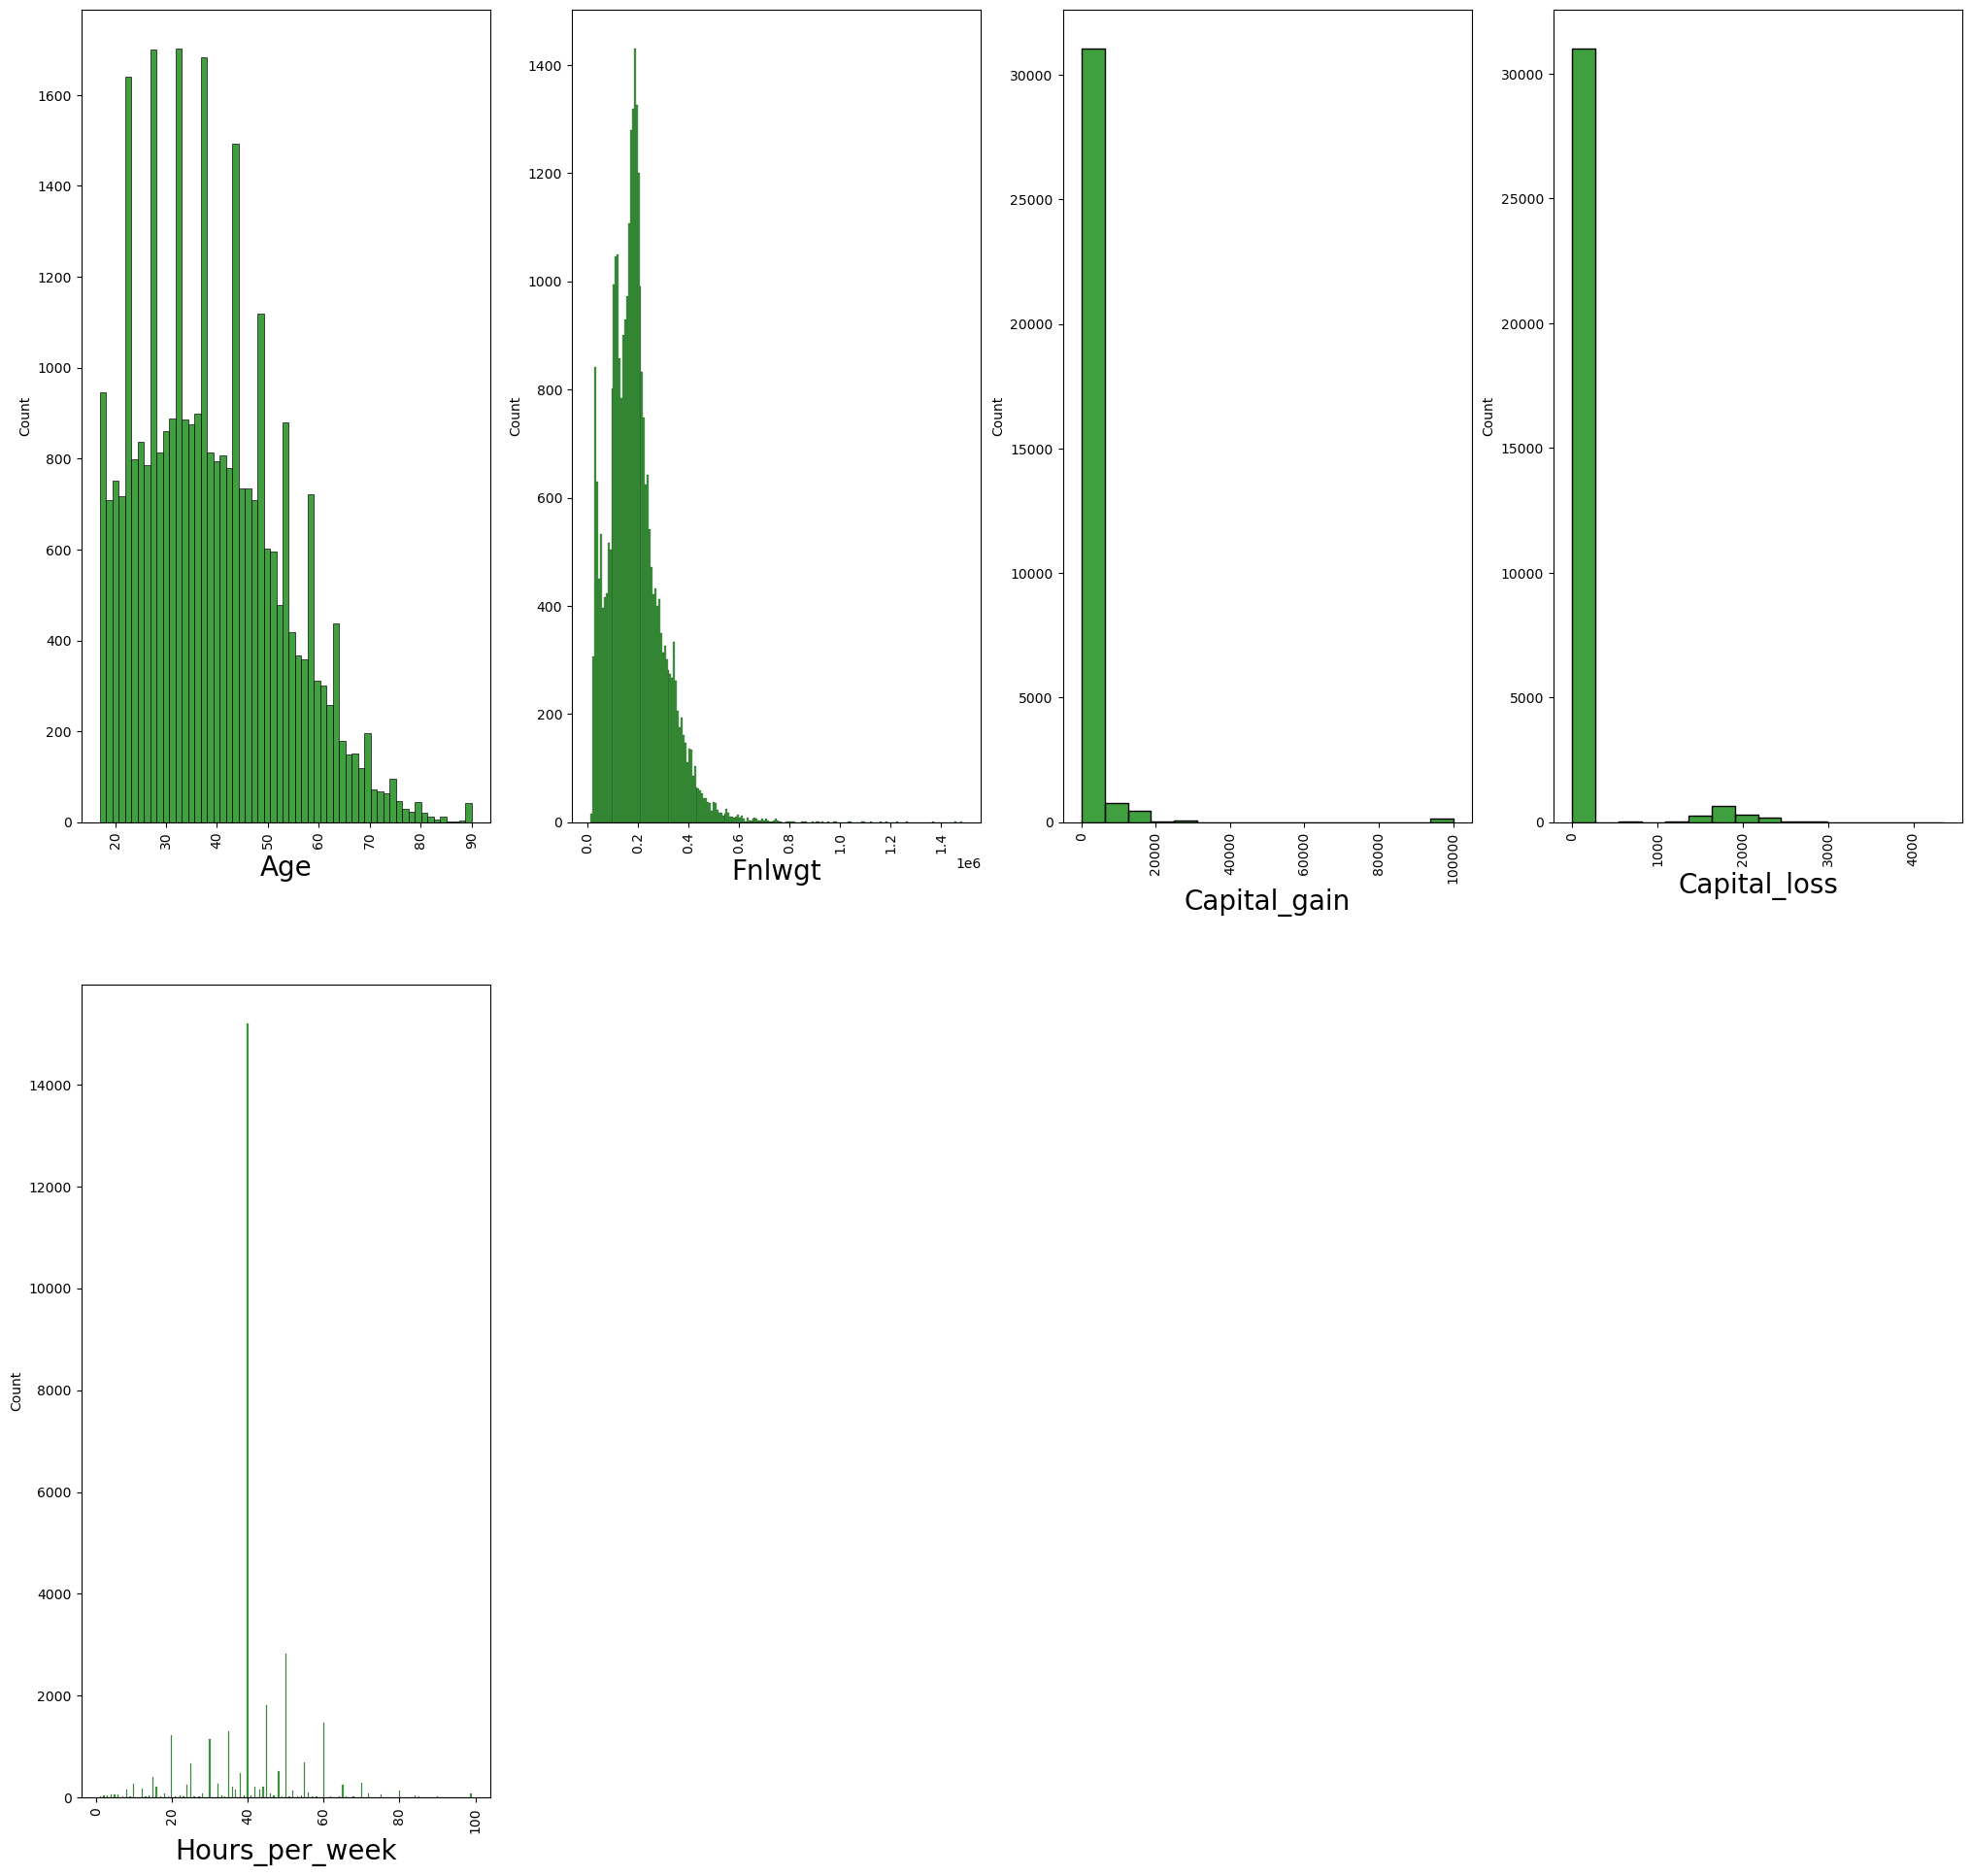

In [46]:
#Getting a graphical view of value counts for each column
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=5:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(df[column], color = 'green')
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=90, fontsize=10)
        
    plotnumber +=1
plt.show()

In [ ]:
#Bivariate analysis of target variable versus categorical columns

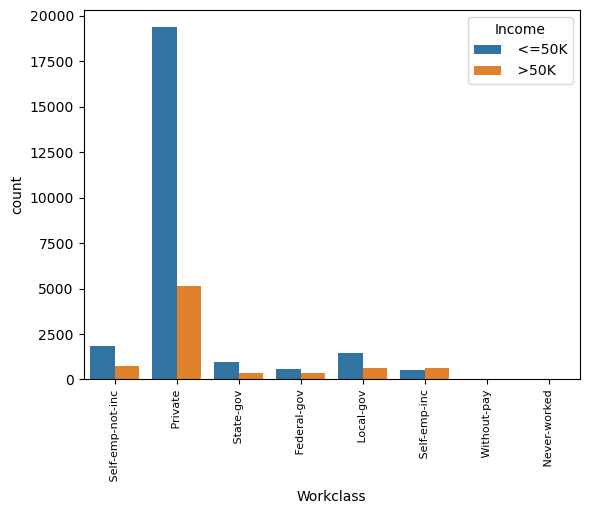

In [47]:
#View Workclass V Income
ax=sns.countplot(x='Workclass',data=df,hue='Income')
plt.xticks(rotation=90, fontsize=8)
plt.show()
#majority of private sector employees earn <=50k

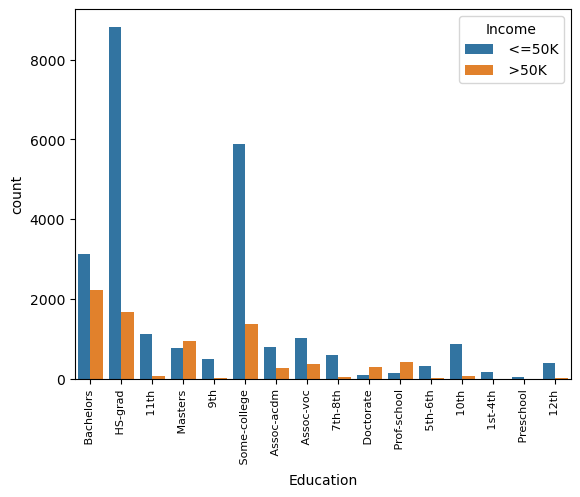

In [48]:
#View Education V Income
ax=sns.countplot(x='Education',data=df,hue='Income')
plt.xticks(rotation=90, fontsize=8)
plt.show()
#majority ofHs grad(high school graduates) and those with some college earn <=50k
#Bachelors degree holders have the most people earning >50k

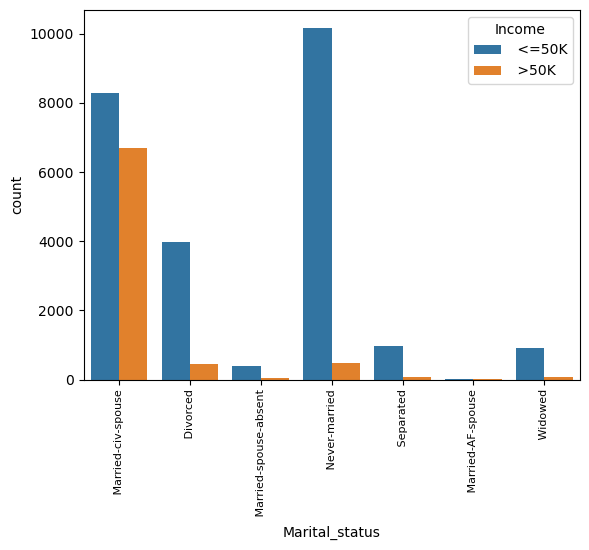

In [49]:
#View Marital_status V Income
ax=sns.countplot(x='Marital_status',data=df,hue='Income')
plt.xticks(rotation=90, fontsize=8)
plt.show()
#most people never married earn <=50k
#most married in civil union have the most salaries

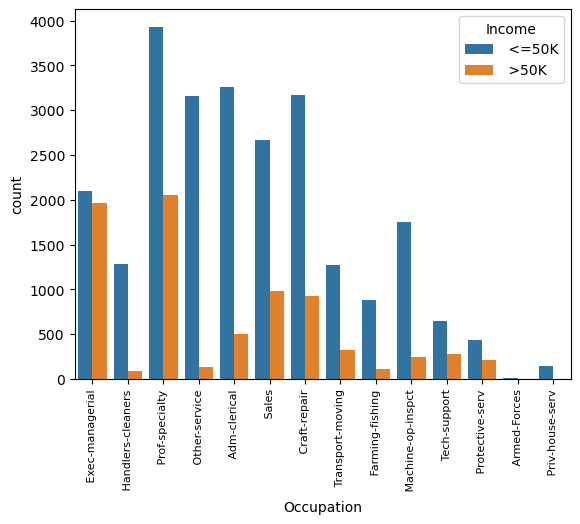

In [50]:
#View Occupation V Income
ax=sns.countplot(x='Occupation',data=df,hue='Income')
plt.xticks(rotation=90, fontsize=8)
plt.show()
#the occupation Prof Speciality has the most people with <50k

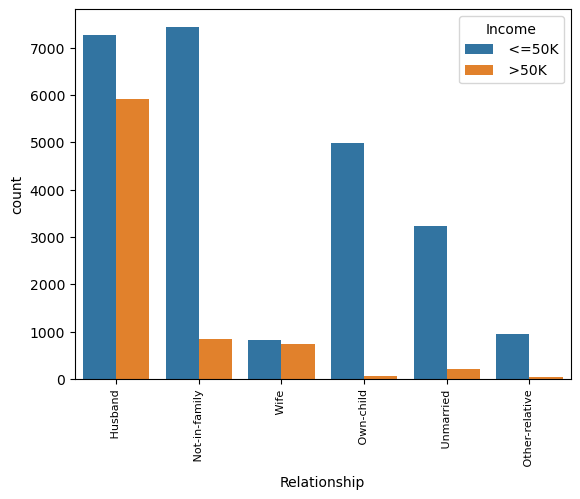

In [51]:
#View Relationship V Income
ax=sns.countplot(x='Relationship',data=df,hue='Income')
plt.xticks(rotation=90, fontsize=8)
plt.show()

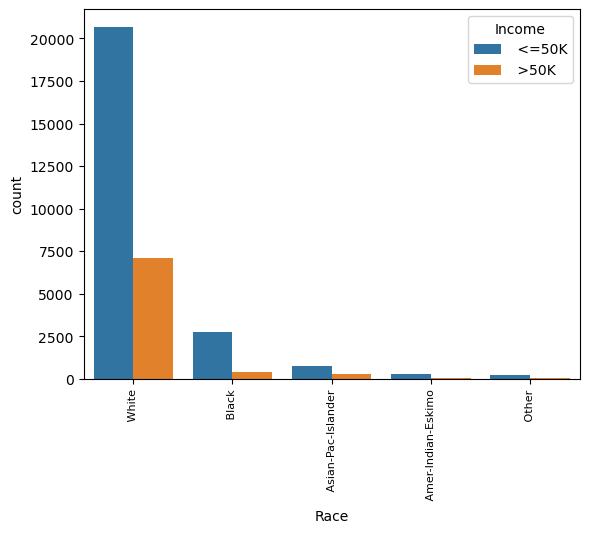

In [52]:
#View Race V Income
ax=sns.countplot(x='Race',data=df,hue='Income')
plt.xticks(rotation=90, fontsize=8)
plt.show()

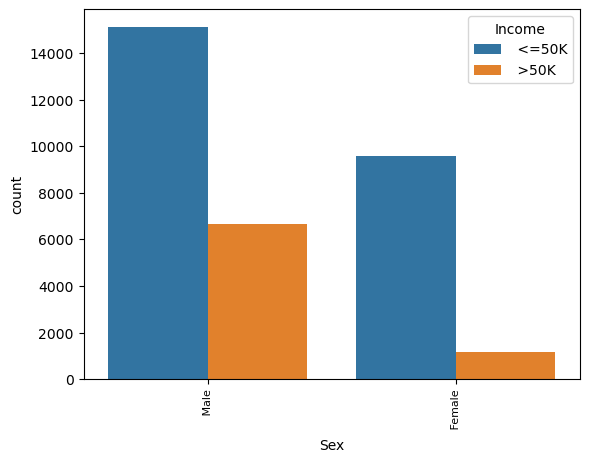

In [53]:
#View Sex V Income
ax=sns.countplot(x='Sex',data=df,hue='Income')
plt.xticks(rotation=90, fontsize=8)
plt.show()

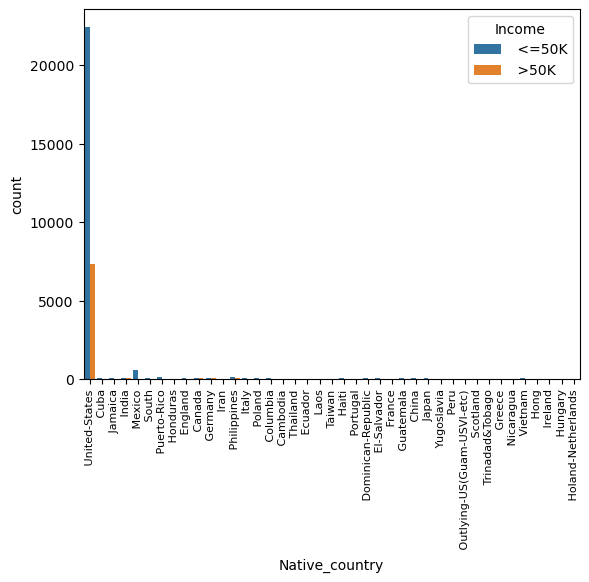

In [55]:
#View Native_country V Income
ax=sns.countplot(x='Native_country',data=df,hue='Income')
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [ ]:
Bivariate analysis-Numerical columns versus Target 

<Axes: title={'center': 'Age V Income'}, xlabel='Age'>

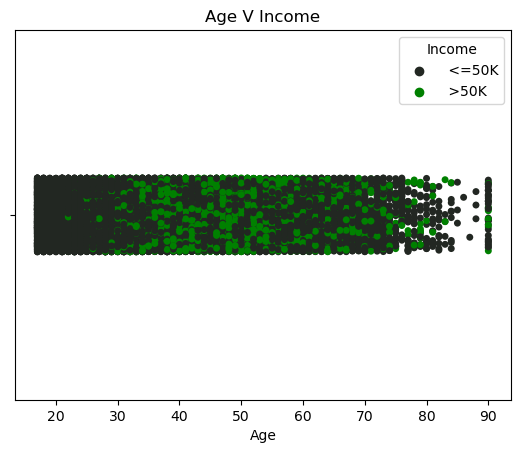

In [56]:
#comparing Age and Income
plt.title("Age V Income")
sns.stripplot(x='Age',data=df,color='green',hue='Income')
#people aged between 35 and 50 earn >50k
#17 to late 20 yeasr old earn <=50k

<Axes: title={'center': 'Fnlwgt V Income'}, xlabel='Fnlwgt'>

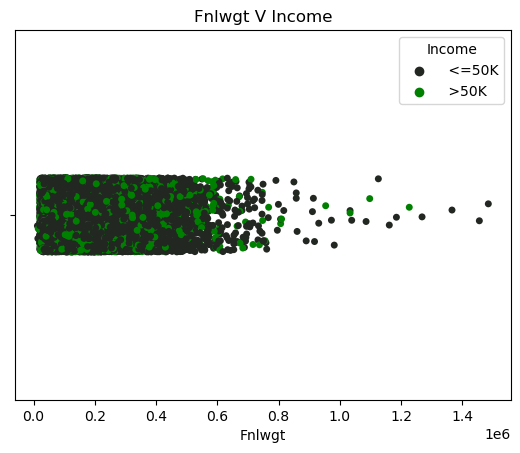

In [57]:
#comparing Fnlwgt and Income
plt.title("Fnlwgt V Income")
sns.stripplot(x='Fnlwgt',data=df,color='green',hue='Income')
#fro a weighting of 0.6 we begin to see a dorminance of income <=50k

<Axes: title={'center': 'Capital_gain V Income'}, xlabel='Capital_gain'>

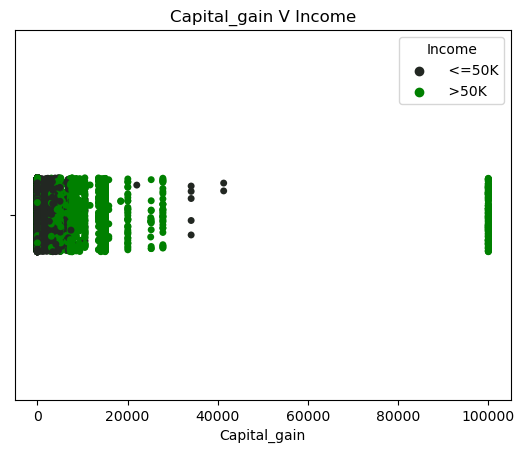

In [58]:
#comparing Capital_gain and Income
plt.title("Capital_gain V Income")
sns.stripplot(x='Capital_gain',data=df,color='green',hue='Income')
#as capital gain increases,its evident that income goes >50k

<Axes: title={'center': 'Capital_loss V Income'}, xlabel='Capital_loss'>

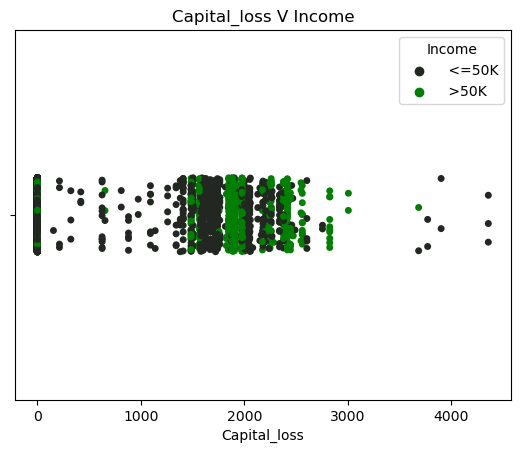

In [59]:
#comparing Capital_loss and Income
plt.title("Capital_loss V Income")
sns.stripplot(x='Capital_loss',data=df,color='green',hue='Income')
#as capital losses increase from 0 to just below 2000,the income is predominantly
#at between 2000 and 3000 capital loss,income becomes less than 50k

<Axes: title={'center': 'Hours_per_week V Income'}, xlabel='Hours_per_week'>

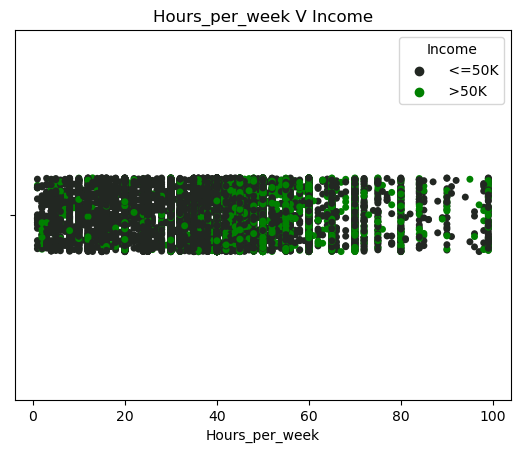

In [60]:
#comparing Hours_per_week and Income
plt.title("Hours_per_week V Income")
sns.stripplot(x='Hours_per_week',data=df,color='green',hue='Income')
#income becomes better from working 40 hours per week or more

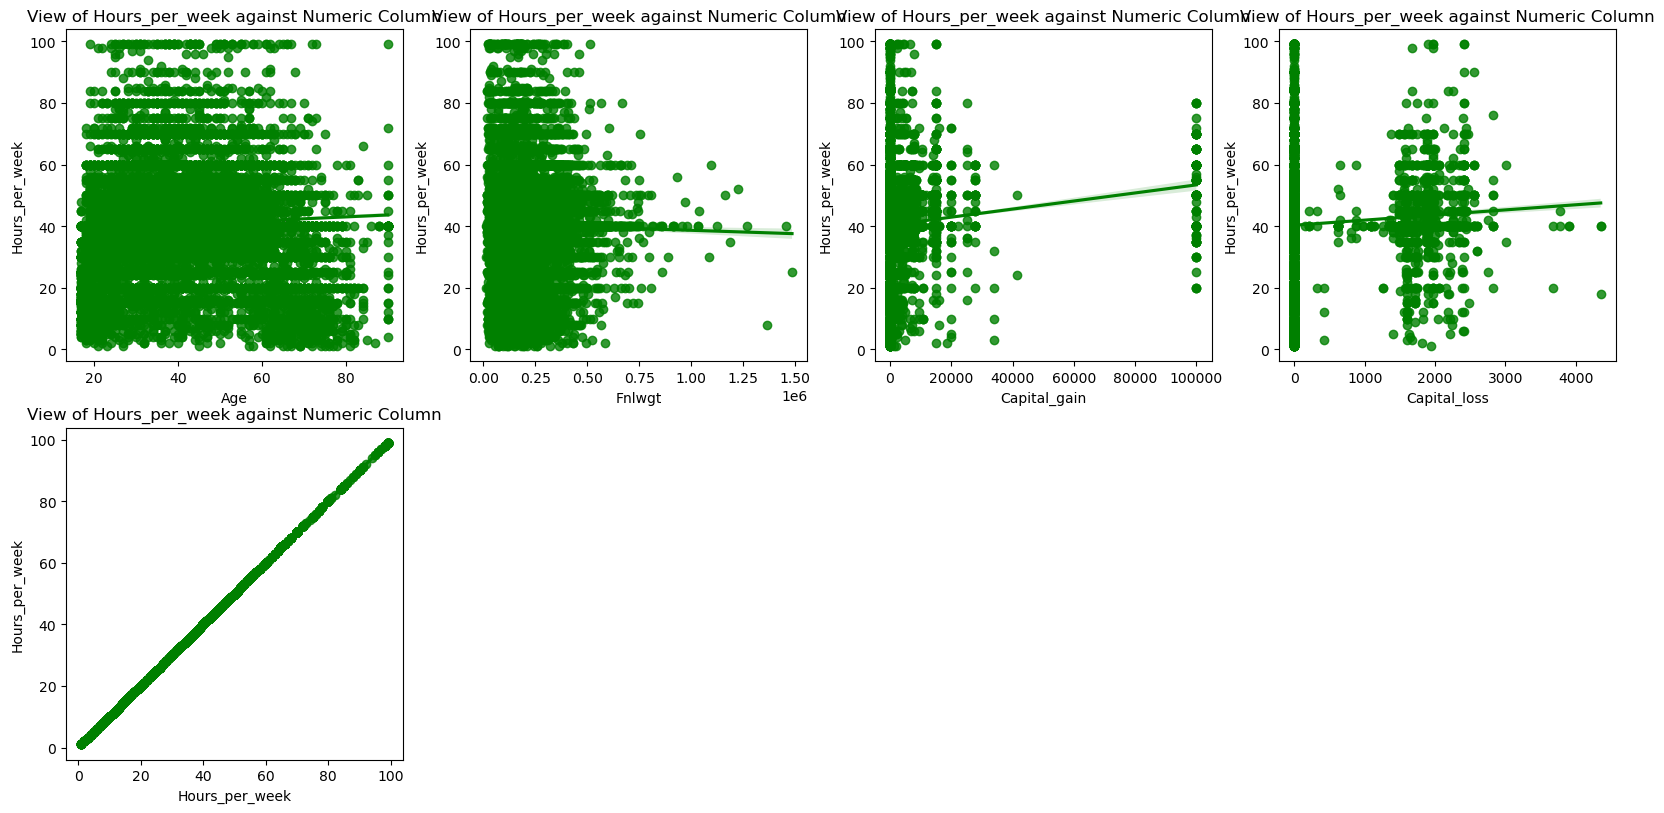

In [62]:
#Bivariate analysis of Hours_per_week versus numerical columns

plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for column in numerical:
    if p<=5:
        plt.subplot(5,4,p)
        sns.regplot(x=df[column],y='Hours_per_week',data=df,color='green')
        plt.title("View of Hours_per_week against Numeric Column")
      
    p+= 1
plt.show()
#there is no reasonable pattern of relationship between hours per week and other numerical columns

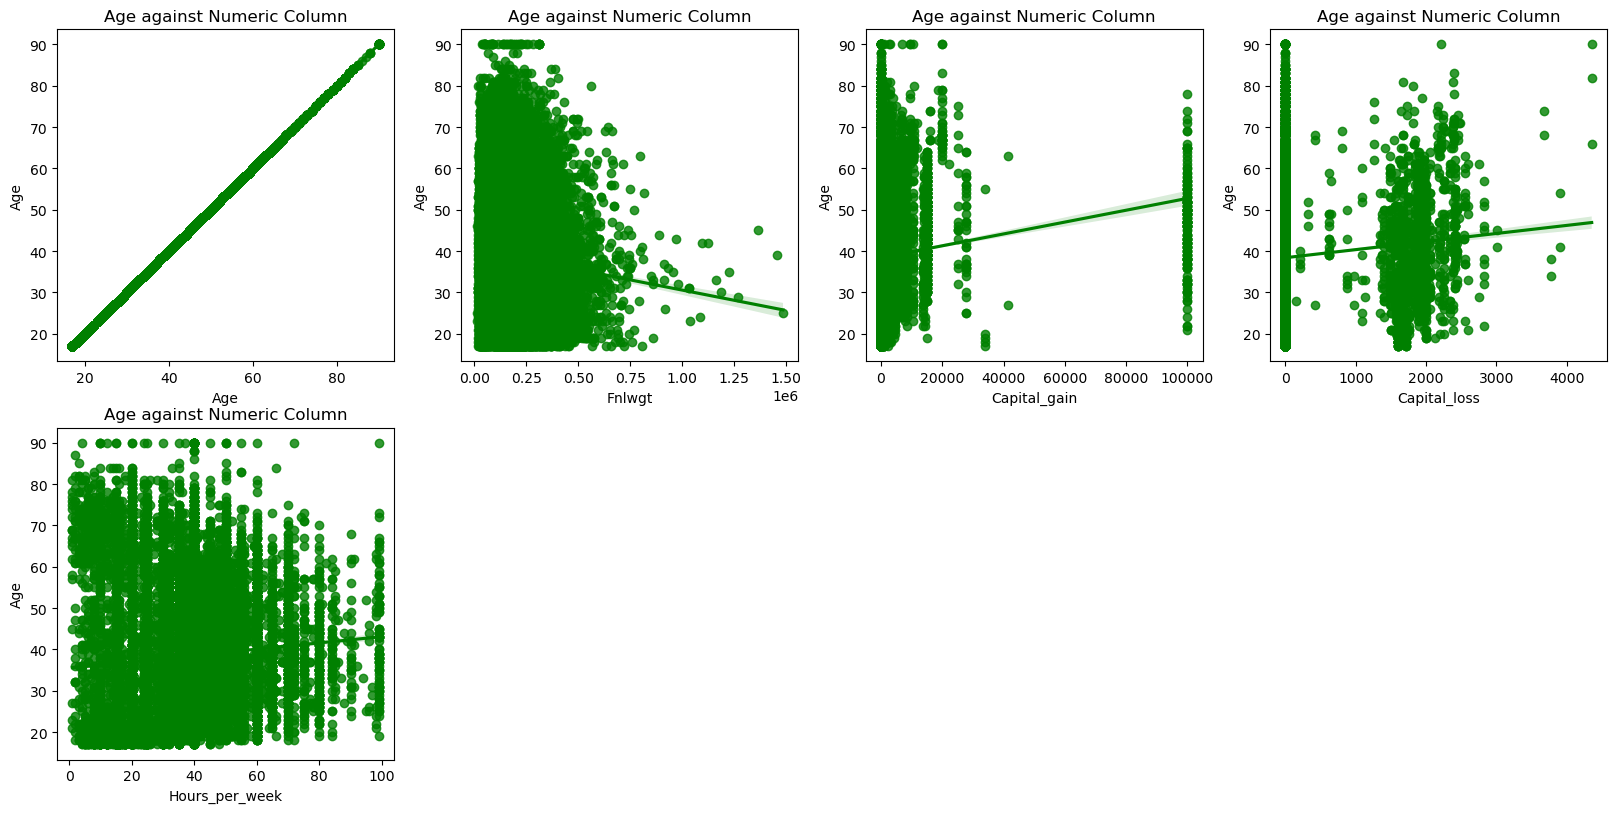

In [63]:
#Bivariate analysis of Hours_per_week versus numerical columns

plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for column in numerical:
    if p<=5:
        plt.subplot(5,4,p)
        sns.regplot(x=df[column],y='Age',data=df,color='green')
        plt.title("Age against Numeric Column")
      
    p+= 1
plt.show()
#there is no reasonable pattern of relationship between Age and other numerical columns

<Axes: title={'center': 'Income by Workclass and Age'}, xlabel='Workclass', ylabel='Age'>

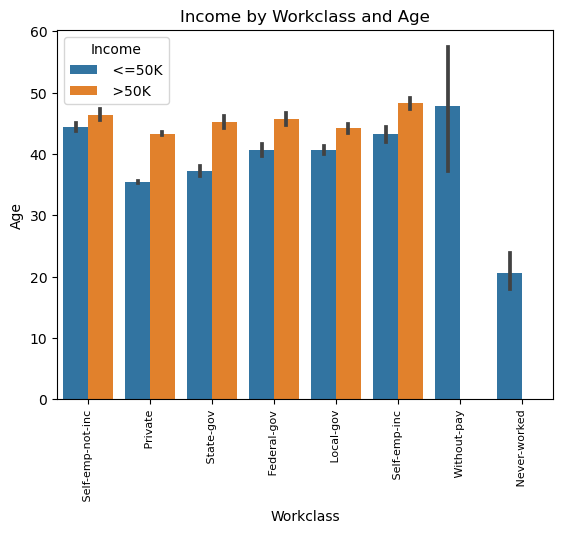

In [64]:
#Multivariate analysis
plt.title("Income by Workclass and Age")
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x='Workclass',y='Age',hue='Income',data=df)

<Axes: title={'center': 'Income by Education and Age'}, xlabel='Education', ylabel='Age'>

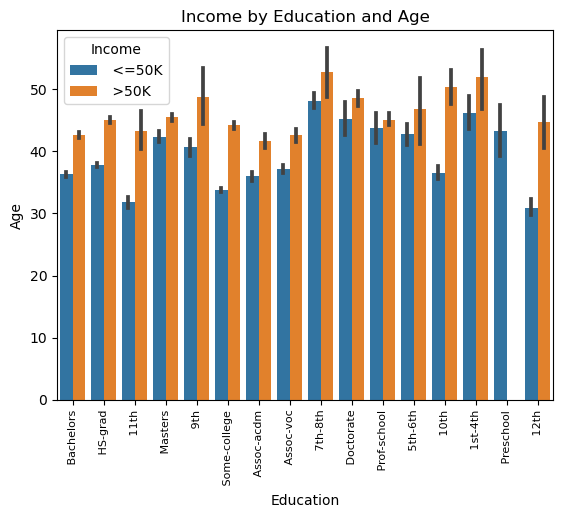

In [65]:
plt.title("Income by Education and Age")
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x='Education',y='Age',hue='Income',data=df)

<Axes: title={'center': 'Income by Marital_status and Age'}, xlabel='Marital_status', ylabel='Age'>

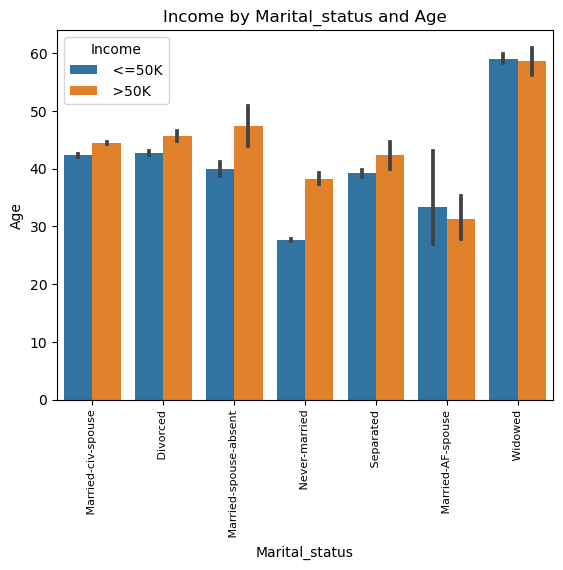

In [66]:
plt.title("Income by Marital_status and Age")
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x='Marital_status',y='Age',hue='Income',data=df)

<Axes: title={'center': 'Income by Occupation and Age'}, xlabel='Occupation', ylabel='Age'>

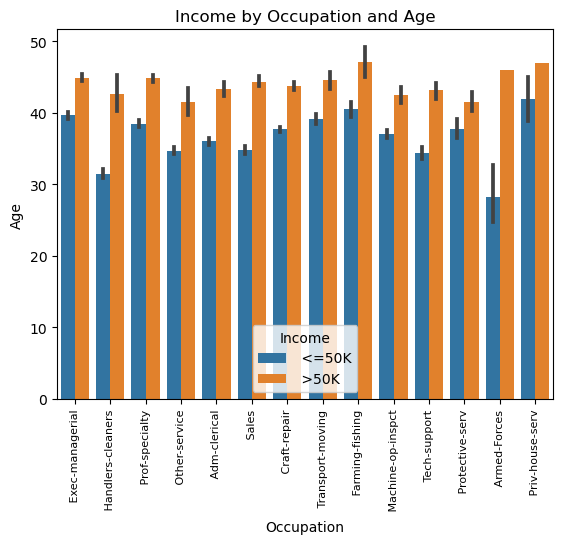

In [67]:
plt.title("Income by Occupation and Age")
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x='Occupation',y='Age',hue='Income',data=df)

<Axes: title={'center': 'Income by Relationship and Age'}, xlabel='Relationship', ylabel='Age'>

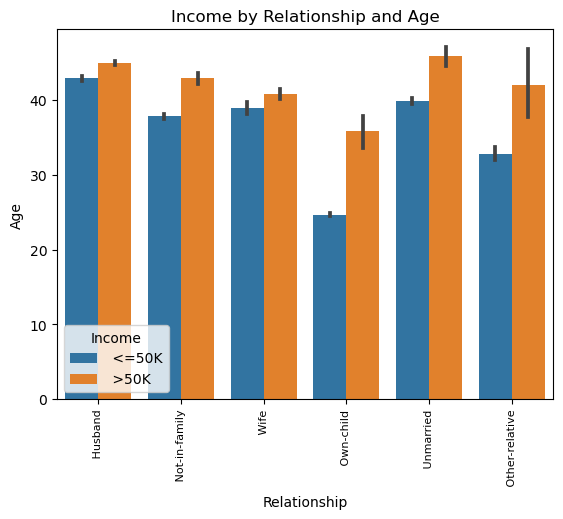

In [68]:
plt.title("Income by Relationship and Age")
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x='Relationship',y='Age',hue='Income',data=df)

<Axes: title={'center': 'Income by Race and Age'}, xlabel='Race', ylabel='Age'>

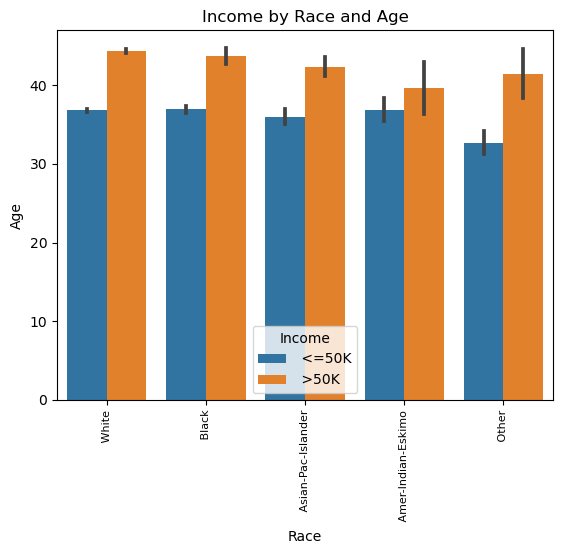

In [69]:
plt.title("Income by Race and Age")
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x='Race',y='Age',hue='Income',data=df)

<Axes: title={'center': 'Income by Sex and Age'}, xlabel='Sex', ylabel='Age'>

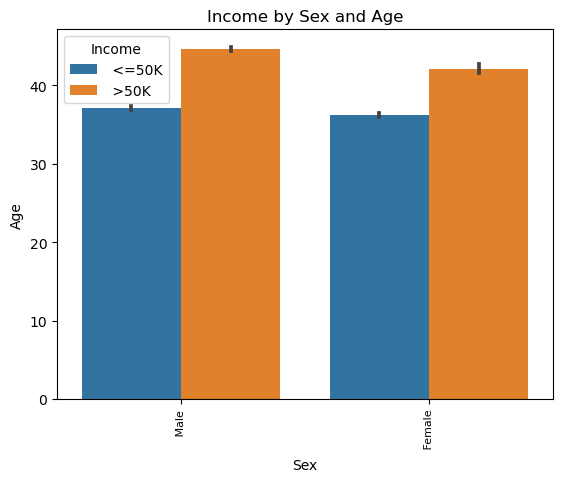

In [70]:
plt.title("Income by Sex and Age")
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x='Sex',y='Age',hue='Income',data=df)

<Axes: title={'center': 'Income by Native_country and Age'}, xlabel='Native_country', ylabel='Age'>

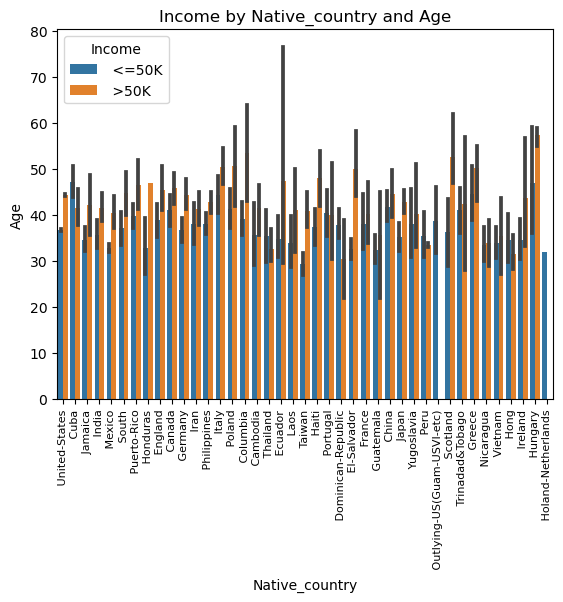

In [71]:
plt.title("Income by Native_country and Age")
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x='Native_country',y='Age',hue='Income',data=df)

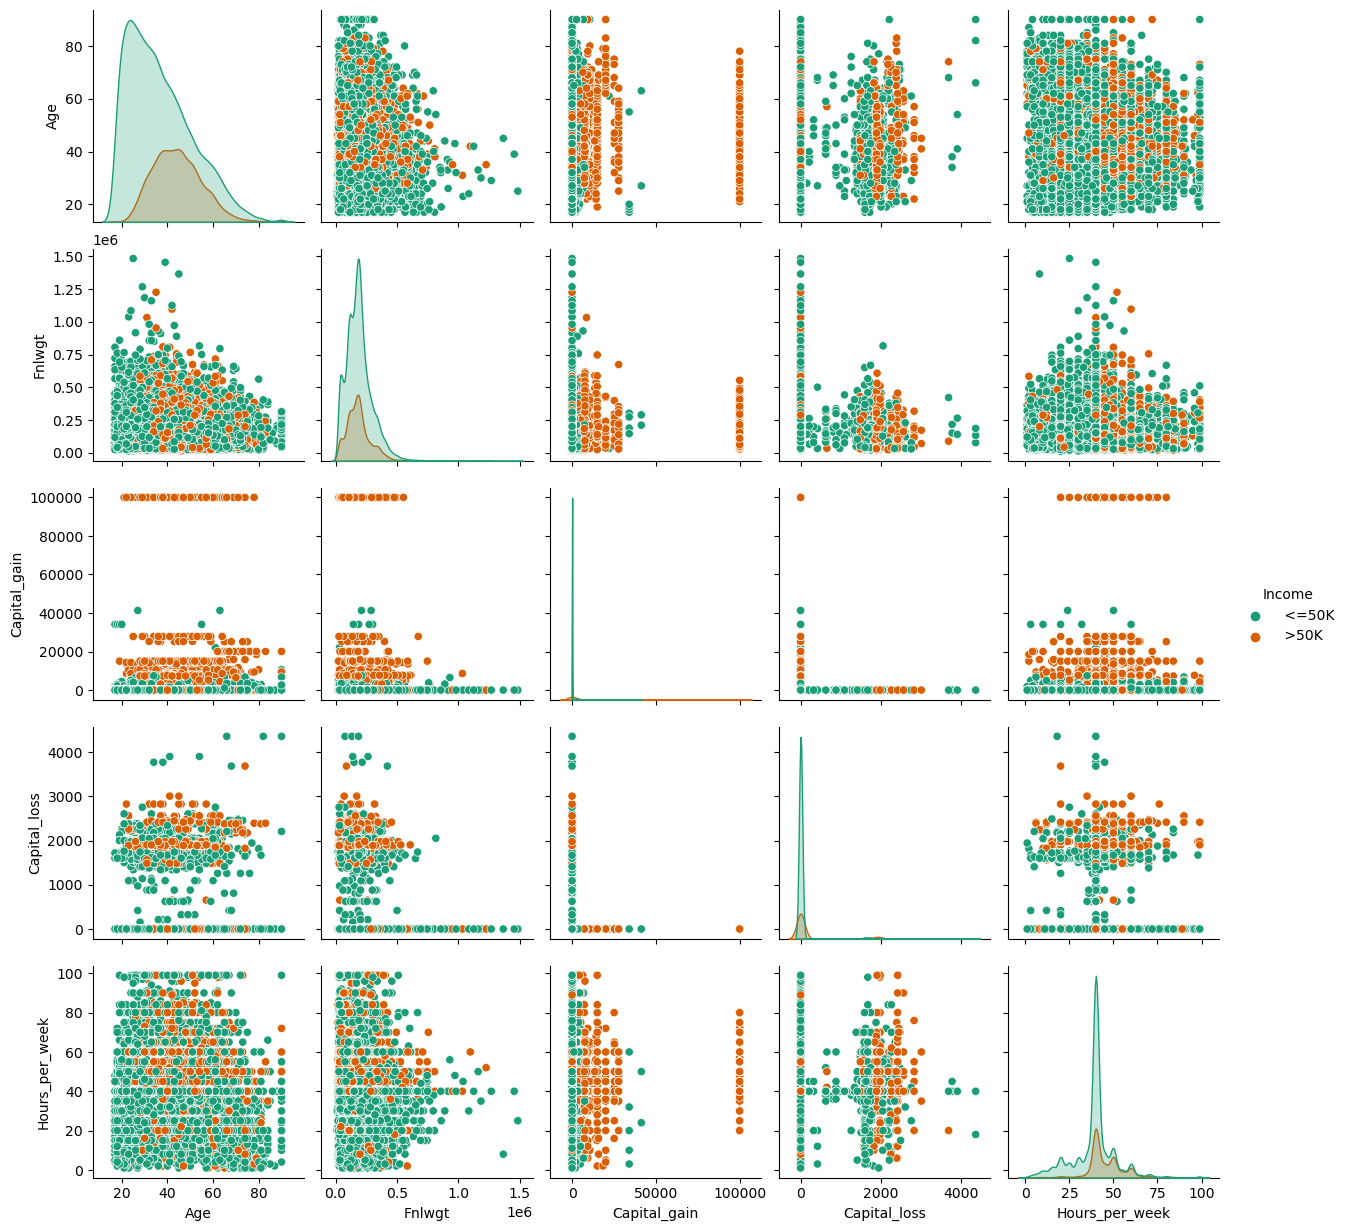

In [72]:
#Multivariate analysis
sns.pairplot(data =df,hue="Income",palette="Dark2")
plt.show()

In [73]:
#Transforming categorical into numerical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Workclass'] = le.fit_transform(df['Workclass'])

df['Education'] = le.fit_transform(df['Education'])

df['Marital_status'] = le.fit_transform(df['Marital_status'])

df['Occupation'] = le.fit_transform(df['Occupation'])

df['Relationship'] = le.fit_transform(df['Relationship'])

df['Race'] = le.fit_transform(df['Race'])

df['Sex'] = le.fit_transform(df['Sex'])

df['Native_country'] = le.fit_transform(df['Native_country'])

df['Income'] = le.fit_transform(df['Income'])





df.head(10)

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,3,7,1,2,0,0,0,16,22,0
6,52,5,209642,11,2,3,0,4,1,0,0,45,38,1
7,31,3,45781,12,4,9,1,4,0,14084,0,50,38,1
8,42,3,159449,9,2,3,0,4,1,5178,0,40,38,1
9,37,3,280464,15,2,3,0,2,1,0,0,80,38,1


In [76]:
#Tabular view of Correlation
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040463,-0.076448,-0.010551,-0.266142,0.001756,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234039
Workclass,0.040463,1.000000,-0.024189,0.004852,-0.020506,0.007285,-0.057904,0.048322,0.071522,0.031497,0.002661,0.042208,-0.001691,0.002747
Fnlwgt,-0.076448,-0.024189,1.000000,-0.028065,0.028154,-0.000073,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.063073,-0.009521
Education,-0.010551,0.004852,-0.028065,1.000000,-0.038413,-0.041258,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.075498,0.079361
Marital_status,-0.266142,-0.020506,0.028154,-0.038413,1.000000,0.034901,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020892,-0.199187
Occupation,0.001756,0.007285,-0.000073,-0.041258,0.034901,1.000000,-0.037443,-0.004789,0.047683,0.018013,0.009644,-0.012851,-0.002124,0.034490
Relationship,-0.263744,-0.057904,0.008859,-0.011060,0.185542,-0.037443,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.010838,-0.250955
Race,0.029116,0.048322,-0.021484,0.014307,-0.067942,-0.004789,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.116848,0.071855
Sex,0.088708,0.071522,0.027113,-0.027426,-0.129425,0.047683,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,0.001745,0.215984
Capital_gain,0.077676,0.031497,0.000433,0.030086,-0.043373,0.018013,-0.057945,0.011152,0.048486,1.000000,-0.031638,0.078408,0.008776,0.223340


<Axes: >

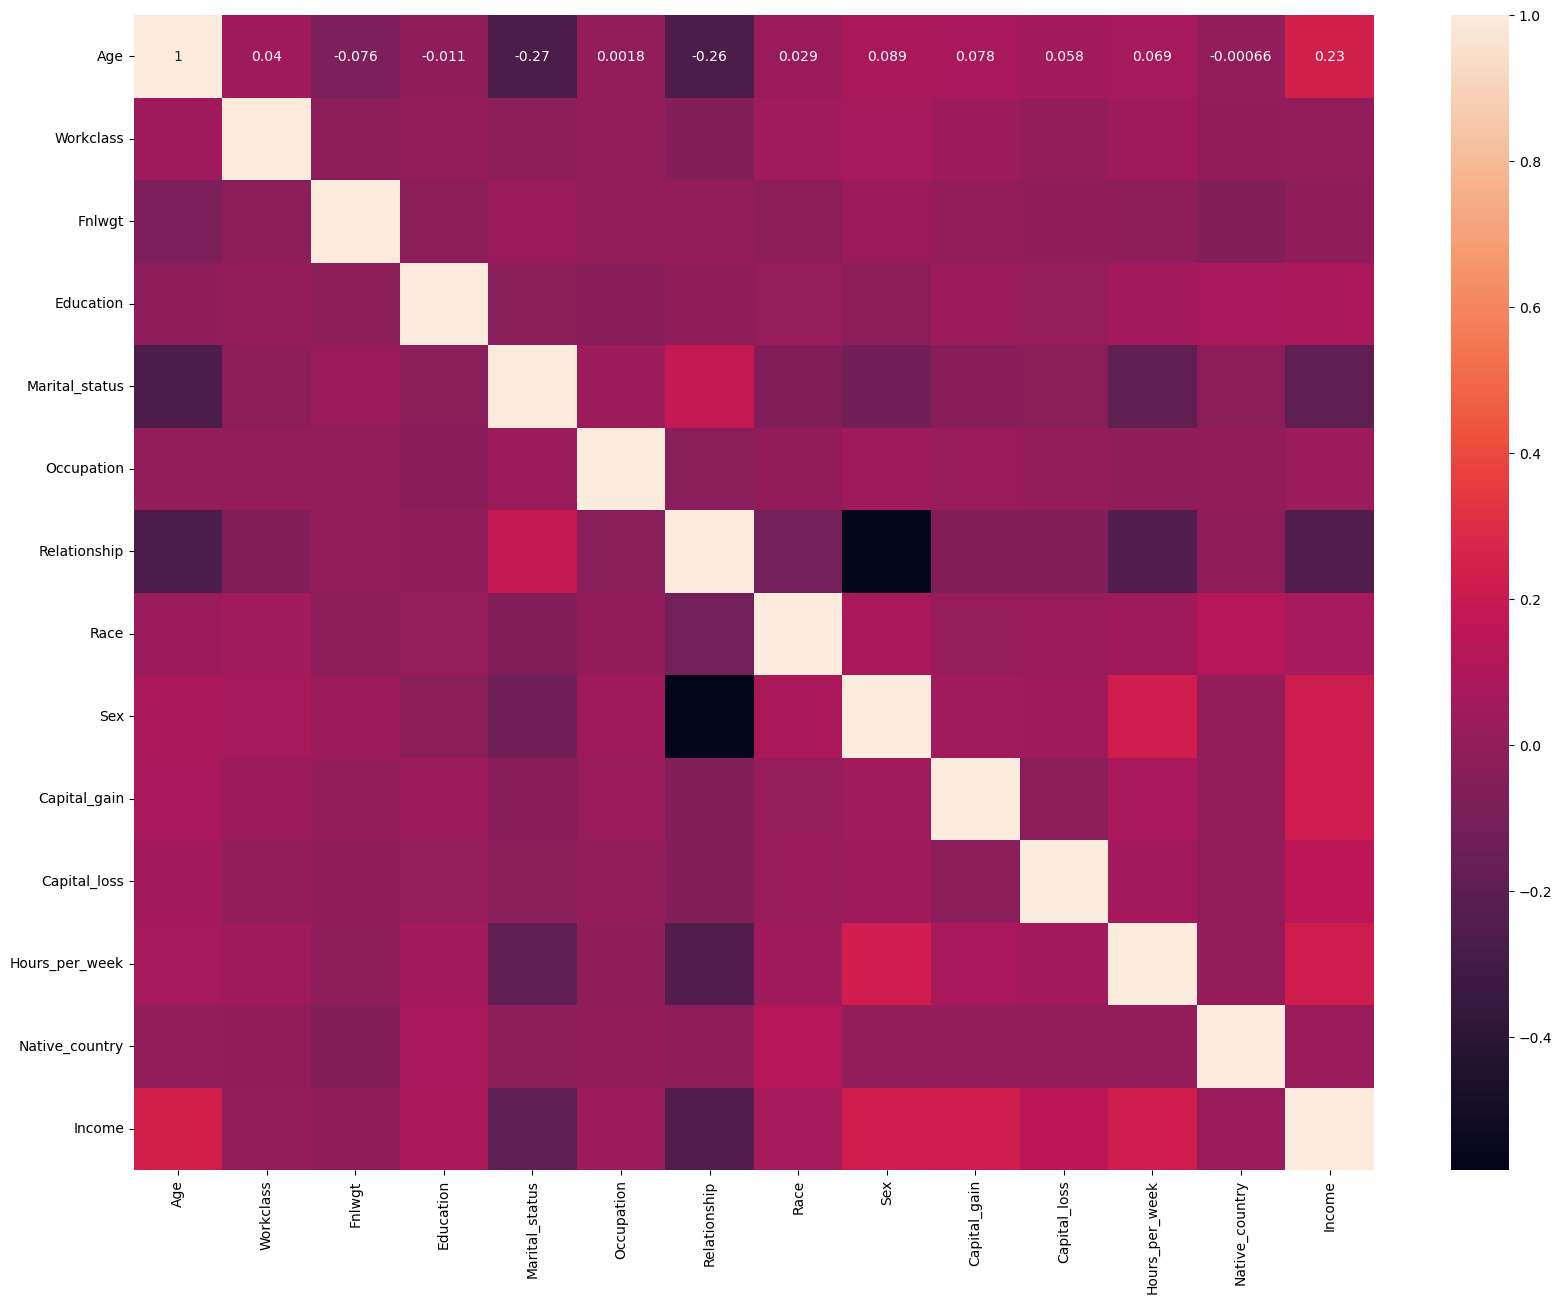

In [74]:
#Visualizing the correlation matrix by plotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(df.corr(),annot=True)

In [ ]:
#the columns have  a mixture of both negative and weak positive correlation with each other
#The table  above demonstrate  multicollinearity which will be dealt with in Standard Scaling and VIF tool

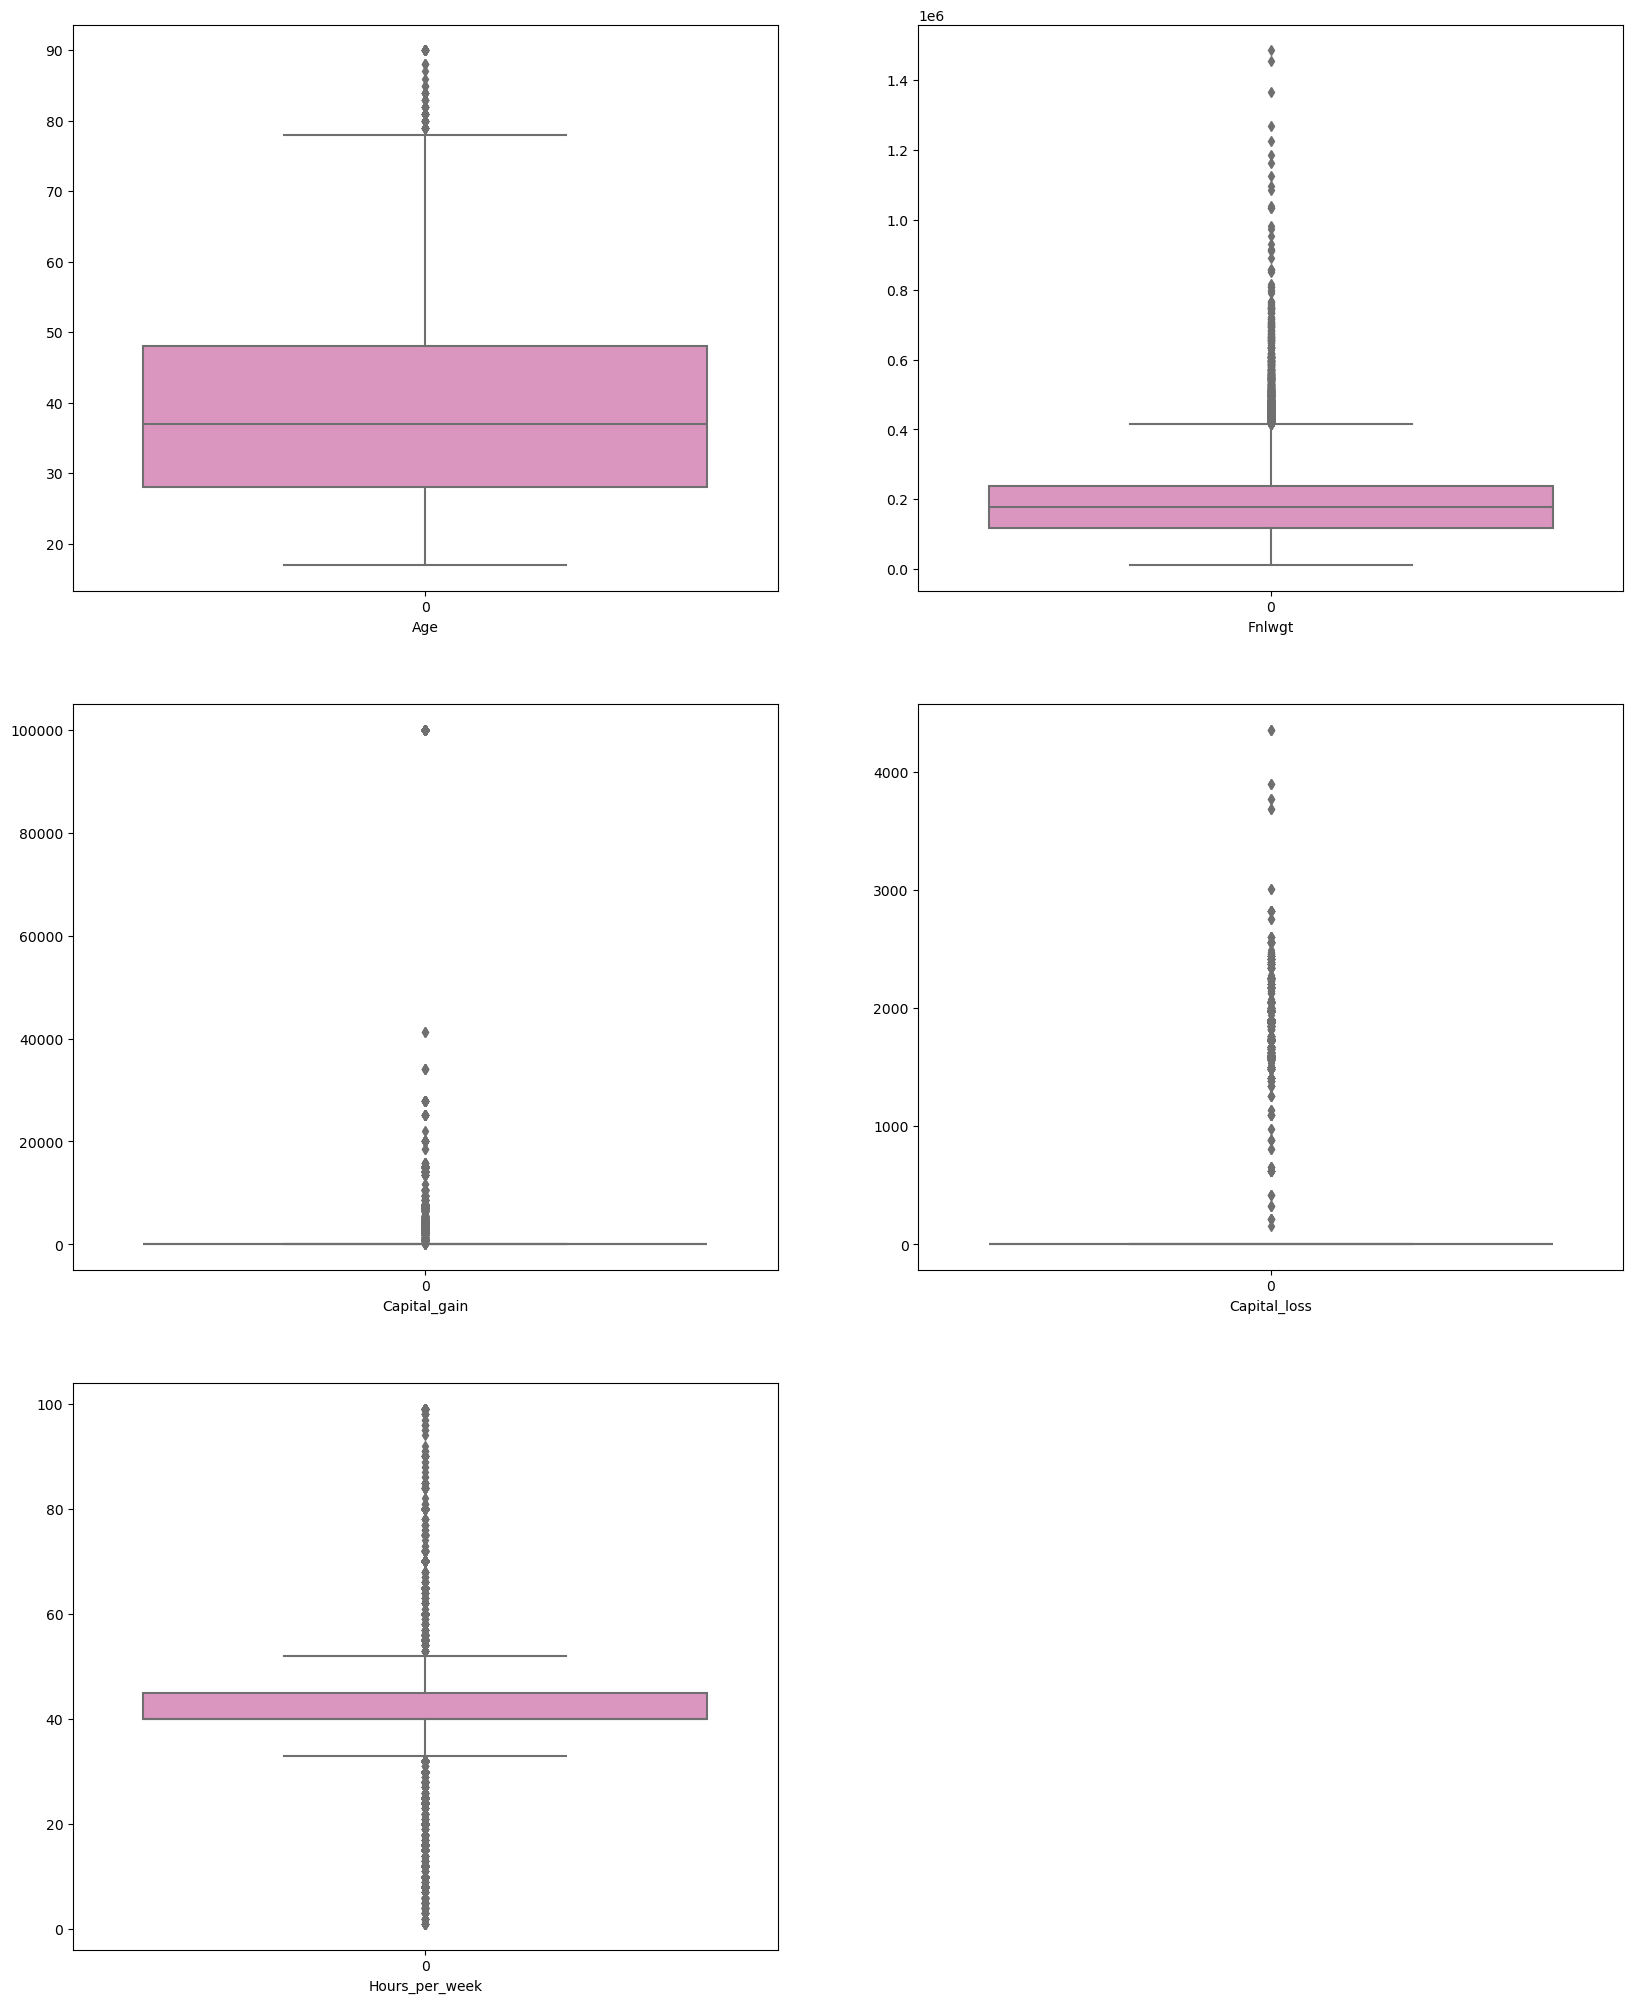

In [77]:
#visualize outliers and dealing with them
plt.figure(figsize=(20,25))
p=1
for column in numerical:
    if p<=5:
        plt.subplot(3,2,p)
        sns.boxplot(df[column], palette ="Set2_r")
        plt.xlabel(column)
        
    p+=1
    
plt.show()

In [78]:
#Remove outliers using zscore method
from scipy.stats import zscore
out_features=df[['Age', 'Fnlwgt', 'Capital_gain','Capital_loss', 'Hours_per_week']]
z=np.abs(zscore(out_features))
z

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,1.008703,0.145969,0.216747,2.222450
1,0.042934,0.245008,0.145969,0.216747,0.035664
2,1.056935,0.425720,0.145969,0.216747,0.035664
3,0.776180,1.408036,0.145969,0.216747,0.035664
4,0.116259,0.898091,0.145969,0.216747,0.035664
...,...,...,...,...,...
32555,0.849505,0.639647,0.145969,0.216747,0.197648
32556,0.103715,0.335469,0.145969,0.216747,0.035664
32557,1.423558,0.358812,0.145969,0.216747,0.035664
32558,1.216128,0.110897,0.145969,0.216747,1.655506


In [79]:
#removing the data above zscore and creating new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(30006, 14)

In [80]:
#shape of old and new dataframe
print("Original Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

Original Data Frame- 32536
New Data Frame- 30006


In [81]:
print("Data Loss Percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)
#there is a 3.3% data loss when using zscore to remove outliers

Data Loss Percentage- 7.77600196705188


In [82]:
#new dataframe after removing outliers buy use of zscore
df1

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,4,0,3,4,1,0,0,20,38,0


In [83]:
#making a copy of the clean dataframe
df=df1.copy()

In [84]:
#checking the shape of the clean data frame
df.shape

(30006, 14)

In [85]:
#Checking for Skewness
df.skew()
#Skeweness is acceptable only within the range of -0.5 and 0.5.On that basis,all the columns except Age,Marital_status,Hour_per_week and Occupation fall short of that criteria.

Age                0.489089
Workclass          0.093472
Fnlwgt             0.634650
Education         -0.927482
Marital_status    -0.046984
Occupation         0.005705
Relationship       0.745512
Race              -2.431482
Sex               -0.681840
Capital_gain       4.955914
Capital_loss      29.750401
Hours_per_week    -0.349780
Native_country    -4.221494
Income             1.338926
dtype: float64

In [86]:
#Removing skeweness  using the cuberoot method
df.skew()

df['Capital_loss']=np.cbrt(df['Capital_loss'])

In [87]:
#Checking for Skewness after using the cuberoot method
df.skew()
#cuberoot method did not work

Age                0.489089
Workclass          0.093472
Fnlwgt             0.634650
Education         -0.927482
Marital_status    -0.046984
Occupation         0.005705
Relationship       0.745512
Race              -2.431482
Sex               -0.681840
Capital_gain       4.955914
Capital_loss      25.843330
Hours_per_week    -0.349780
Native_country    -4.221494
Income             1.338926
dtype: float64

In [88]:
#Removing skeweness in Capital_loss Bags using log1p method
df["Capital_loss"]=np.log1p(df["Capital_loss"])

In [89]:
#Checking for Skewness after using the log1p method
df.skew()
#log1p method did not work

Age                0.489089
Workclass          0.093472
Fnlwgt             0.634650
Education         -0.927482
Marital_status    -0.046984
Occupation         0.005705
Relationship       0.745512
Race              -2.431482
Sex               -0.681840
Capital_gain       4.955914
Capital_loss      25.119931
Hours_per_week    -0.349780
Native_country    -4.221494
Income             1.338926
dtype: float64

In [90]:
#Removing skeweness using yeo johnson method 
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [91]:
#Removing skewness using yeo-johnson
#yeo-johnson method did not work
df[['Age', 'Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']] = scaler.fit_transform(df[['Age', 'Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']].values)

In [92]:
#Checking for Skewness after using the yeo-johnson
df.skew()

Age               -0.017314
Workclass          0.093472
Fnlwgt            -0.034764
Education         -0.927482
Marital_status    -0.046984
Occupation         0.005705
Relationship       0.745512
Race              -2.431482
Sex               -0.681840
Capital_gain       3.081061
Capital_loss      24.943713
Hours_per_week     0.108420
Native_country    -4.221494
Income             1.338926
dtype: float64

In [ ]:
#I used three methods to remove skeweness but none of them worked therefore i will proceed

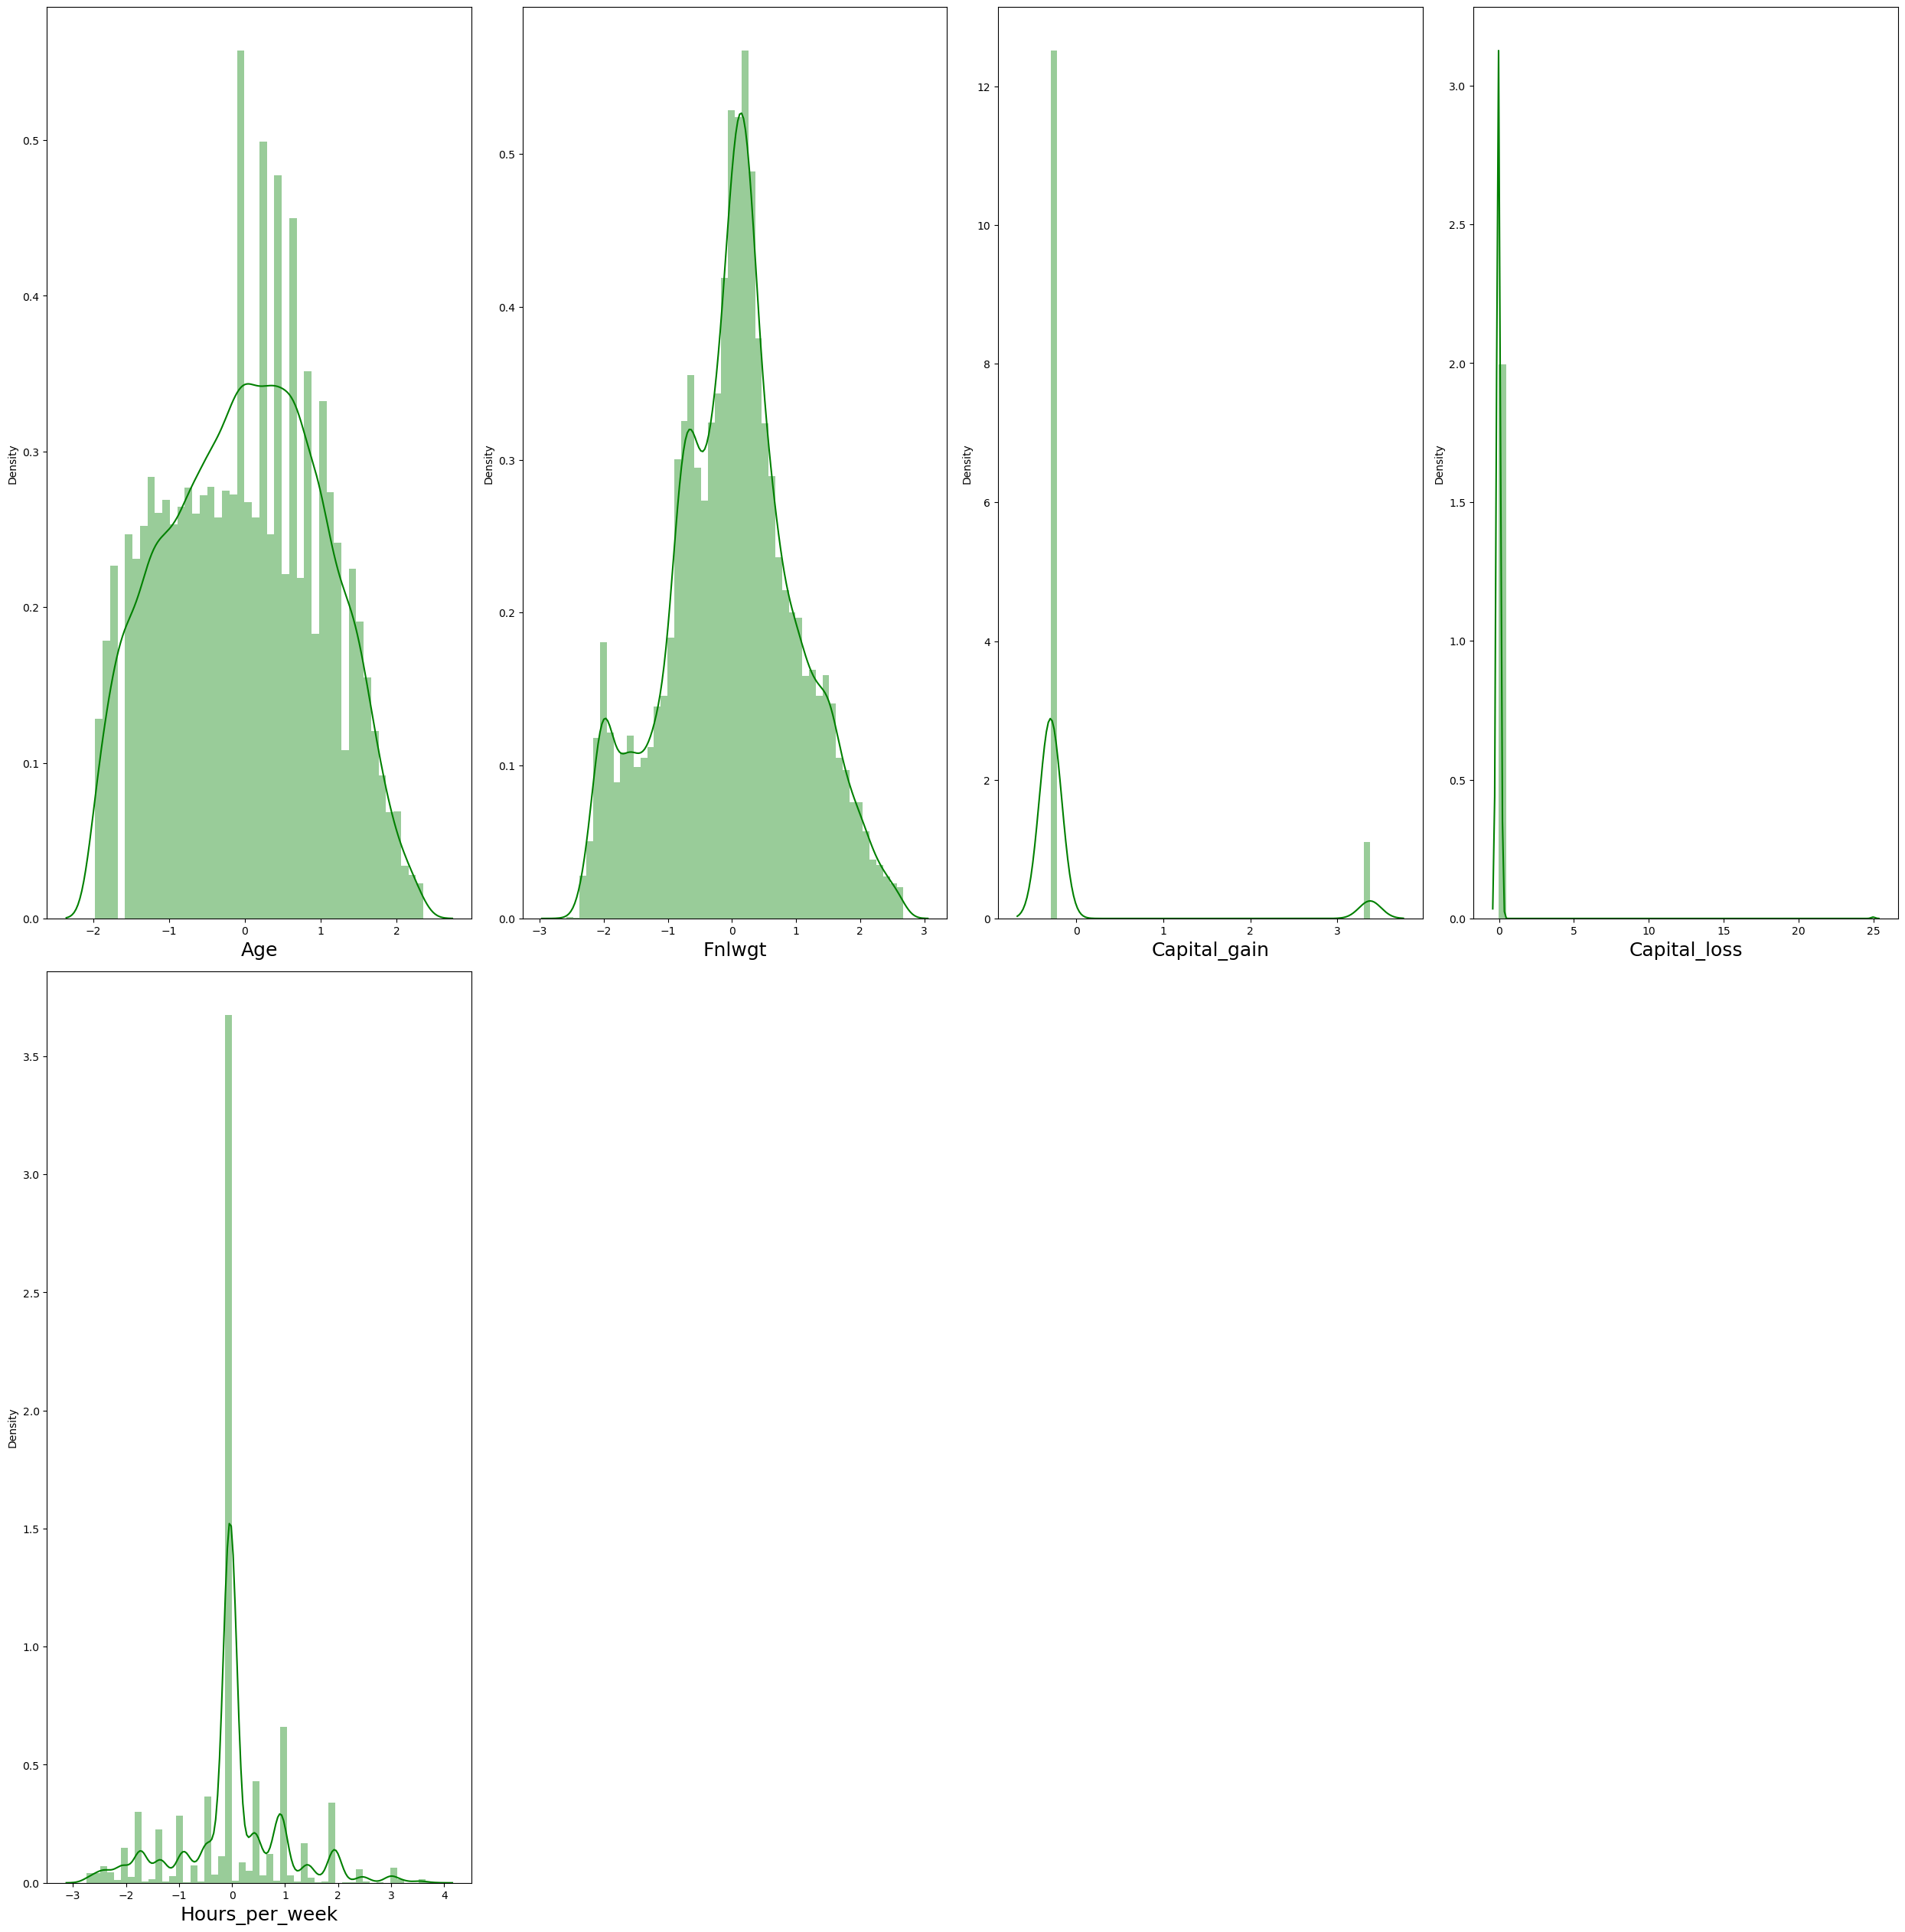

In [93]:
#checking distribution of data after trying to remove skeweness
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=5:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column], color = 'green')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()

In [ ]:
#Dealing with multicollinearity.It be must removed but before that we need to seperate features and labels


In [94]:
#seperate the target and independent variables into x and y
x=df.drop("Income",axis=1)
y=df["Income"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (30006, 13)
Label Dimension= (30006,)


In [95]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.924401,1.736742,-1.116187,-0.329591,-0.411867,-0.782072,-0.918751,0.394718,0.715608,-0.296119,-0.040028,-2.216862,0.262603
1,0.126509,-0.078051,0.422190,0.183840,-1.732427,-0.279495,-0.297317,0.394718,0.715608,-0.296119,-0.040028,-0.034958,0.262603
2,1.099341,-0.078051,0.601942,-2.383317,-0.411867,-0.279495,-0.918751,-1.952703,0.715608,-0.296119,-0.040028,-0.034958,0.262603
3,-0.711882,-0.078051,1.480433,-0.329591,-0.411867,0.725661,2.188418,-1.952703,-1.397414,-0.296119,-0.040028,-0.034958,-5.335276
4,0.051237,-0.078051,1.042640,0.440556,-0.411867,-0.782072,2.188418,0.394718,-1.397414,-0.296119,-0.040028,-0.034958,0.262603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,-0.808314,-0.078051,0.806332,-0.843023,-0.411867,1.479527,2.188418,0.394718,-1.397414,-0.296119,-0.040028,-0.217888,0.262603
30002,0.272405,-0.078051,-0.211102,0.183840,-0.411867,-0.028206,-0.918751,0.394718,0.715608,-0.296119,-0.040028,-0.034958,0.262603
30003,1.373877,-0.078051,-0.238776,0.183840,2.229255,-1.535939,1.566984,0.394718,-1.397414,-0.296119,-0.040028,-0.034958,0.262603
30004,-1.337967,-0.078051,0.284060,0.183840,0.908694,-1.535939,0.945550,0.394718,0.715608,-0.296119,-0.040028,-1.720527,0.262603


In [96]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.219384,Age
1,1.008021,Workclass
2,1.011494,Fnlwgt
3,1.014908,Education
4,1.159979,Marital_status
5,1.006671,Occupation
6,1.665982,Relationship
7,1.032465,Race
8,1.545117,Sex
9,1.021623,Capital_gain


In [ ]:
#VIF Values are below the threshold of 10 therefore I will proceed

In [98]:
#checking the target variable
y.value_counts()

Income
0    23349
1     6657
Name: count, dtype: int64

In [ ]:
#the data is not balanced.This is a classification problem so we need to balance the data using an oversampling method

In [99]:
#Oversampling the data
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x, y)

Defaulting to user installation because normal site-packages is not writeable


In [100]:
#Modelling

#Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  0.8630304376805155 at random_state 190


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [102]:
#Import classification algorithms

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [103]:
#checking accuracy for Random Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8631415241057543
[[6598  402]
 [ 830 1172]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7000
           1       0.74      0.59      0.66      2002

    accuracy                           0.86      9002
   macro avg       0.82      0.76      0.79      9002
weighted avg       0.86      0.86      0.86      9002



In [104]:
#checking testing accuracy:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.8218173739169073
[[6326  674]
 [ 930 1072]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7000
           1       0.61      0.54      0.57      2002

    accuracy                           0.82      9002
   macro avg       0.74      0.72      0.73      9002
weighted avg       0.81      0.82      0.82      9002



In [105]:
#checking accuracy of Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.797045101088647
[[6655  345]
 [1482  520]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7000
           1       0.60      0.26      0.36      2002

    accuracy                           0.80      9002
   macro avg       0.71      0.61      0.62      9002
weighted avg       0.77      0.80      0.76      9002



In [106]:
#checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.8112641635192179
[[6746  254]
 [1445  557]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7000
           1       0.69      0.28      0.40      2002

    accuracy                           0.81      9002
   macro avg       0.76      0.62      0.64      9002
weighted avg       0.79      0.81      0.78      9002



In [107]:
#checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8648078204843368
[[6660  340]
 [ 877 1125]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7000
           1       0.77      0.56      0.65      2002

    accuracy                           0.86      9002
   macro avg       0.83      0.76      0.78      9002
weighted avg       0.86      0.86      0.86      9002



In [108]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8611419684514552
[[6597  403]
 [ 847 1155]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7000
           1       0.74      0.58      0.65      2002

    accuracy                           0.86      9002
   macro avg       0.81      0.76      0.78      9002
weighted avg       0.85      0.86      0.85      9002



In [109]:
#checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8459231281937347
[[6534  466]
 [ 921 1081]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7000
           1       0.70      0.54      0.61      2002

    accuracy                           0.85      9002
   macro avg       0.79      0.74      0.76      9002
weighted avg       0.84      0.85      0.84      9002



In [110]:
#checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8522550544323484
[[6538  462]
 [ 868 1134]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7000
           1       0.71      0.57      0.63      2002

    accuracy                           0.85      9002
   macro avg       0.80      0.75      0.77      9002
weighted avg       0.84      0.85      0.85      9002



In [112]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [113]:
#Checking CV score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predRFC)-score.mean())

[0.85054982 0.85285786 0.85652391 0.85985669 0.85552408]
0.855062471260899
Difference between Accuracy score and cross validation score is - 0.008079052844855328


In [114]:
#Checking CV score for KNeighbours Classifier
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predKNN)-score.mean())

[0.81272909 0.81003166 0.81786369 0.81819697 0.81336444]
0.8144371695020729
Difference between Accuracy score and cross validation score is - 0.007380204414834446


In [115]:
#Checking CV score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predLR)-score.mean())

[0.79606798 0.79053491 0.80319947 0.79653391 0.79703383]
0.7966740187309668
Difference between Accuracy score and cross validation score is - 0.00037108235768024134


In [116]:
#Checking CV score for Support Vector Machine Classifier
score=cross_val_score(SVC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predSVC)-score.mean())

[0.81106298 0.8131978  0.81536411 0.81503083 0.8161973 ]
0.814170602800233
Difference between Accuracy score and cross validation score is - -0.002906439281015083


In [117]:
#Checking CV score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predGB)-score.mean())

[0.85788071 0.86135644 0.87002166 0.86952175 0.86368939]
0.8644939883117336
Difference between Accuracy score and cross validation score is - 0.00031383217260316787


In [118]:
#Checking CV score for AdaBoost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predABC)-score.mean())

[0.85321559 0.856024   0.86085652 0.86818864 0.85935677]
0.8595283047627127
Difference between Accuracy score and cross validation score is - 0.0016136636887424949


In [119]:
#Checking CV score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predBC)-score.mean())

[0.83572143 0.83386102 0.8410265  0.84785869 0.84185969]
0.84006546504162
Difference between Accuracy score and cross validation score is - 0.005857663152114667


In [120]:
#Checking CV score for ExtraTreesClassifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predET)-score.mean())

[0.84171943 0.83936011 0.84869188 0.84735877 0.84152641]
0.8437313207989716
Difference between Accuracy score and cross validation score is - 0.008523733633376773


In [ ]:
I selected Gradient Boosting Classifier as the best model because it has the least difference between Accuracy and 
cross validation score which is 0.00031

In [127]:

#Hyper parameter tuning

from sklearn.model_selection import RandomizedSearchCV
parameters={'max_depth' : [1,3,5,6,7,10,None], 
              'verbose' : [0,0.1, 0.5,1.0,2.0],
              'min_samples_split' : [0.1,2, 0.3,.05, 1.0], 
              'n_estimators': [10,20,50, 60, 80, 100],
              'criterion':['entropy', 'log_loss', 'gini']}

random_cv=RandomizedSearchCV(GradientBoostingClassifier(),parameters,cv=5)
model=RandomForestClassifier()
random_cv=RandomizedSearchCV(estimator=model,
                             param_distributions=parameters,
                             cv=5,
                             n_iter=50,
                             scoring='accuracy',
                             verbose=5,
                             return_train_score=True)
random_cv.fit(x_train,y_train)

Final_model=GradientBoostingClassifier()
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=entropy, max_depth=1, min_samples_split=0.1, n_estimators=10, verbose=0;, score=(train=0.778, test=0.778) total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=1, min_samples_split=0.1, n_estimators=10, verbose=0;, score=(train=0.778, test=0.778) total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=1, min_samples_split=0.1, n_estimators=10, verbose=0;, score=(train=0.816, test=0.814) total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=1, min_samples_split=0.1, n_estimators=10, verbose=0;, score=(train=0.778, test=0.778) total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=1, min_samples_split=0.1, n_estimators=10, verbose=0;, score=(train=0.816, test=0.814) total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_split=0.05, n_estimators=20, verbose=0.5;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_sa

In [ ]:
The accuracy score did not change after parameter tuning,this is acceptable

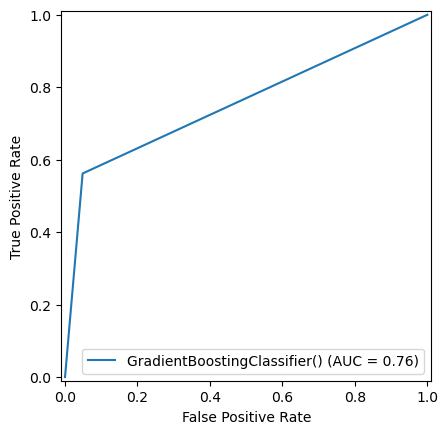

In [128]:
#Plotting ROC and compare AUC for  the model used
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

In [ ]:
The model has an AUC = 76% and 86 % accuracy

In [129]:
#Saving the model
import joblib
joblib.dump(Final_model,"Census_Income_Project.pkl")

['Census_Income_Project.pkl']

In [130]:
#Loading the saved model to get predictions
model=joblib.load("Census_Income_Project.pkl")

In [131]:
#Prediction
prediction=model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df
#the predictions for Income

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
8997,1,1
8998,1,1
8999,0,1
9000,0,0
